# Data checks
- Create a subset of the training data (randomized 100,000 rows for training data set while keeping the index is same for the numerical, categorical and date data)
- Create a subset of the test data (randomized 30,000 rows for the test data set while keeping the index same for the numerical, categorical and date data)
- Missing values
- Identify duplicates
- Identify outliers
- Box plot, IQR, Z score
- Data types that are correct
- Incorrect or impossible values

# Prepare the test dataset

In [2]:
import numpy as np

total_rows = 1184687  # Total rows including header
sample_size = 100000

# Generate a shared random sample of row indices to KEEP (excluding the header row)
rows_to_keep = sorted(np.random.choice(np.arange(1, total_rows), size=sample_size, replace=False))


In [4]:
# All data rows (excluding header) are 1 to total_rows-1
all_rows = set(range(1, total_rows))
rows_to_skip = sorted(all_rows - set(rows_to_keep))


In [6]:
import pandas as pd

def read_aligned_sample(file_path, rows_to_skip):
    return pd.read_csv(file_path, skiprows=rows_to_skip, low_memory=False)

# Read all files using the same rows
sampled_data = {
    'train_numerical': read_aligned_sample('train_numeric.csv', rows_to_skip),
    'train_categorical': read_aligned_sample('train_categorical.csv', rows_to_skip),
    'train_date': read_aligned_sample('train_date.csv', rows_to_skip)
}


In [8]:
# Printing the shape of the sampled numerical, categorical and date data
for key, df in sampled_data.items():
    print(f"{key}: {df.shape}, First ID: {df.iloc[0, 0]}")


train_numerical: (99922, 970), First ID: 49
train_categorical: (99922, 2141), First ID: 49
train_date: (99922, 1157), First ID: 49


In [10]:
import pandas as pd

# Save
pd.Series(rows_to_keep).to_csv("train_rows_to_keep.csv", index=False, header=["row_index"])

# Load back
rows_to_keep_loaded = pd.read_csv("train_rows_to_keep.csv")["row_index"].tolist()


In [12]:
total_rows = 1184687  # adjust to your dataset size (including header row)

# All possible data rows (excluding header row)
all_rows = set(range(1, total_rows))

# Skip everything that is not in rows_to_keep
rows_to_skip = sorted(all_rows - set(rows_to_keep))


In [14]:
preview_files = {
    'train_numerical': 'train_numeric.csv',
    'train_categorical': 'train_categorical.csv',
    'train_date': 'train_date.csv'
}

preview_data = {}
for name, path in preview_files.items():
    preview_data[name] = pd.read_csv(
        path,
        skiprows=rows_to_skip,  # ensure alignment
        nrows=100,              # preview only 100 rows
        low_memory=False
    )
    
# Display nicely in notebook (return df objects)
preview_data['train_numerical'].head()




,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,49,0.088,0.033,0.330,0.348,-0.056,0.161,0.008,0.088,-0.112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,153,0.095,0.086,-0.215,-0.179,0.161,0.025,-0.030,-0.112,0.138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,159,-0.049,0.011,-0.033,0.003,0.031,0.116,0.015,-0.032,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
preview_data['train_categorical'].head()


,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
preview_data['train_date'].head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,49,675.84,675.84,675.84,675.84,675.84,675.84,675.84,675.84,675.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,153,96.42,96.42,96.42,96.42,96.42,96.42,96.42,96.42,96.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,159,877.14,877.14,877.14,877.14,877.14,877.14,877.14,877.14,877.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Count Total NaNs in Each Reduced DataFrame
for name, df in sampled_data.items():
    total_nans = df.isna().sum().sum()
    print(f"Total NaNs in {name}: {total_nans}")


Total NaNs in train_numerical: 78437156
Total NaNs in train_categorical: 208132815
Total NaNs in train_date: 95011391


In [22]:
#Count NaNs Per Column
nan_counts = {}
for name, df in sampled_data.items():
    nan_counts[name] = (
        df.isna().sum()
        .reset_index()
        .rename(columns={"index": "column", 0: "NaN_count"})
    )
nan_counts["train_numerical"]


,column,NaN_count
0,Id,0
1,L0_S0_F0,42853
2,L0_S0_F2,42853
3,L0_S0_F4,42853
4,L0_S0_F6,42853
...,...,...
965,L3_S51_F4256,94949
966,L3_S51_F4258,94949
967,L3_S51_F4260,94949
968,L3_S51_F4262,94949


In [23]:
# NaN counts for categorical 
nan_counts["train_categorical"]


,column,NaN_count
0,Id,0
1,L0_S1_F25,99919
2,L0_S1_F27,99919
3,L0_S1_F29,99919
4,L0_S1_F31,99919
...,...,...
2136,L3_S49_F4234,99919
2137,L3_S49_F4235,99915
2138,L3_S49_F4237,99915
2139,L3_S49_F4239,99919


In [24]:
# NaN counts for date
nan_counts["train_date"]

,column,NaN_count
0,Id,0
1,L0_S0_D1,42853
2,L0_S0_D3,42853
3,L0_S0_D5,42853
4,L0_S0_D7,42853
...,...,...
1152,L3_S51_D4255,94949
1153,L3_S51_D4257,94949
1154,L3_S51_D4259,94949
1155,L3_S51_D4261,94949


In [28]:
#Count Rows With Any or All NaNs
for name, df in sampled_data.items():
    rows_with_any_nan = df.isna().any(axis=1).sum()
    rows_with_all_nan = df.isna().all(axis=1).sum()
    print(f"\n{name}:")
    print(f"  Rows with ≥1 NaN: {rows_with_any_nan}")
    print(f"  Rows with all NaN: {rows_with_all_nan}")



train_numerical:
  Rows with ≥1 NaN: 99922
  Rows with all NaN: 0

train_categorical:
  Rows with ≥1 NaN: 99922
  Rows with all NaN: 0

train_date:
  Rows with ≥1 NaN: 99922
  Rows with all NaN: 0


In [29]:
# Percentage of NaN counts for train_numerical
nan_counts_numeric = (
    sampled_data['train_numerical'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_numeric["NaN_pct"] = nan_counts_numeric["NaN_count"] / len(sampled_data['train_numerical']) * 100
nan_counts_numeric





,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S0_F0,42853,42.886451
2,L0_S0_F2,42853,42.886451
3,L0_S0_F4,42853,42.886451
4,L0_S0_F6,42853,42.886451
...,...,...,...
965,L3_S51_F4256,94949,95.023118
966,L3_S51_F4258,94949,95.023118
967,L3_S51_F4260,94949,95.023118
968,L3_S51_F4262,94949,95.023118


In [30]:
nan_counts_categorical = (
    sampled_data['train_categorical'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_categorical["NaN_pct"] = nan_counts_categorical["NaN_count"] / len(sampled_data['train_categorical']) * 100
nan_counts_categorical


,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S1_F25,99919,99.996998
2,L0_S1_F27,99919,99.996998
3,L0_S1_F29,99919,99.996998
4,L0_S1_F31,99919,99.996998
...,...,...,...
2136,L3_S49_F4234,99919,99.996998
2137,L3_S49_F4235,99915,99.992995
2138,L3_S49_F4237,99915,99.992995
2139,L3_S49_F4239,99919,99.996998


In [31]:
nan_counts_date = (
    sampled_data['train_date'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_date["NaN_pct"] = nan_counts_date["NaN_count"] / len(sampled_data['train_date']) * 100
nan_counts_date

,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S0_D1,42853,42.886451
2,L0_S0_D3,42853,42.886451
3,L0_S0_D5,42853,42.886451
4,L0_S0_D7,42853,42.886451
...,...,...,...
1152,L3_S51_D4255,94949,95.023118
1153,L3_S51_D4257,94949,95.023118
1154,L3_S51_D4259,94949,95.023118
1155,L3_S51_D4261,94949,95.023118


In [32]:
# Average NaNs per row (how many missing values each row has on average) 

nan_avg_per_row_numerical = sampled_data['train_numerical'].isna().sum(axis=1).mean()
nan_avg_per_row_categorical = sampled_data['train_categorical'].isna().sum(axis=1).mean()
nan_avg_per_row_date = sampled_data['train_date'].isna().sum(axis=1).mean()
print("Average NaNs per row numerical:", nan_avg_per_row_numerical.round(2))
print("Average NaNs per row categorical:", nan_avg_per_row_categorical.round(2))
print("Average NaNs per row date:", nan_avg_per_row_date.round(2))

Average NaNs per row numerical: 784.98
Average NaNs per row categorical: 2082.95
Average NaNs per row date: 950.86


## The data checks shows that there is a large number of missing values in the sampled 100,000 data frame for all three files (numerical, categorical, and date).  This will pose a significant issue for logistic regression which is sensitive to NaN or missing values. Must drop rows that have lots of NaNs, and/or use PCA and/or L1 regression that will reduce factors that are not important to zero.

# Prepare the test data set

In [39]:
total_rows_test = 1183748  # Total rows including header
sample_size_test = 30000

# Generate a shared random sample of row indices to KEEP (excluding the header row)
rows_to_keep_test = sorted(np.random.choice(np.arange(1, total_rows_test), size=sample_size_test, replace=False))

In [42]:
# All data rows (excluding header) are 1 to total_rows-1
all_rows = set(range(1, total_rows_test))
rows_to_skip_test = sorted(all_rows - set(rows_to_keep_test))

import pandas as pd

def read_aligned_sample(file_path, rows_to_skip_test):
    return pd.read_csv(file_path, skiprows=rows_to_skip_test, low_memory=False)

# Read all files using the same rows
sampled_data_test = {
    'test_numerical': read_aligned_sample('test_numeric.csv', rows_to_skip_test),
    'test_categorical': read_aligned_sample('test_categorical.csv', rows_to_skip_test),
    'test_date': read_aligned_sample('test_date.csv', rows_to_skip_test)
}

for key, df in sampled_data_test.items():
    print(f"{key}: {df.shape}, First ID: {df.iloc[0, 0]}")

# Save
pd.Series(rows_to_keep_test).to_csv("test_rows_to_keep.csv", index=False, header=["row_index"])

# Load back
rows_to_keep_test_loaded = pd.read_csv("test_rows_to_keep.csv")["row_index"].tolist()

total_rows = 1183748  # adjust to your dataset size (including header row)

# All possible data rows (excluding header row)
all_rows = set(range(1, total_rows_test))

# Skip everything that is not in rows_to_keep
rows_to_skip = sorted(all_rows - set(rows_to_keep_test))

preview_files = {
    'test_numerical': 'test_numeric.csv',
    'test_categorical': 'test_categorical.csv',
    'test_date': 'test_date.csv'
}

preview_data = {}
for name, path in preview_files.items():
    preview_data[name] = pd.read_csv(
        path,
        skiprows=rows_to_skip_test,  # ensure alignment
        nrows=100,              # preview only 100 rows
        low_memory=False
    )
    
# Display nicely in notebook (return df objects for test_numeric)
preview_data['test_numerical'].head()




test_numerical: (30001, 969), First ID: 19
test_categorical: (30001, 2141), First ID: 19
test_date: (30001, 1157), First ID: 19


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,0.075,0.123,-0.179,-0.216,0.074,0.161,-0.022,-0.152,0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,241,0.173,0.093,0.003,0.003,0.031,0.116,-0.030,-0.072,0.148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300,0.023,0.004,-0.033,0.021,-0.143,-0.294,-0.007,-0.032,-0.102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 

In [44]:
# Display nicely in notebook (return df objects for test_categorical)
preview_data['test_categorical'].head()



,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Display nicely in notebook (return df objects for test_date)
preview_data['test_date'].head()


,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,37,1143.13,1143.13,1143.13,1143.13,1143.13,1143.13,1143.13,1143.13,1143.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,241,1095.27,1095.27,1095.27,1095.27,1095.27,1095.27,1095.27,1095.27,1095.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300,270.90,270.90,270.90,270.90,270.90,270.90,270.90,270.90,270.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## I am able to sample 30001 rows from the test datasets. This will be used as the test data in the test-train split. 

# Exploratory data analysis (EDA)
- Correlation matrix
- Univariate analysis - density, count plots, histograms, summary statistics
- Bivariate analysis - Correlation matrix, scatterplots, box plots
- Multivariate analysis - map different aspects to a chart

In [53]:
print(sampled_data.keys())


dict_keys(['train_numerical', 'train_categorical', 'train_date'])


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

num_df = sampled_data['train_numerical'].copy()
cat_df = sampled_data['train_categorical'].copy()
date_df = sampled_data['train_date'].copy()

# Ensure Id exists and is unique 
for df in [num_df, cat_df, date_df]:
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

# Target ('Response' in train_numeric)
target_col = 'Response' if 'Response' in num_df.columns else None


In [57]:
# Numeric summary (exclude Id/target)
num_cols = [c for c in num_df.columns if c != target_col]
num_summary = num_df[num_cols].describe().T
num_missing = num_df[num_cols].isna().mean().sort_values(ascending=False).to_frame('missing_pct')

# Categorical summary (top categories)
cat_cols = cat_df.columns.tolist()
cat_summary = cat_df[cat_cols].describe(include='object').T  # count, unique, top, freq
cat_missing = cat_df[cat_cols].isna().mean().sort_values(ascending=False).to_frame('missing_pct')

display(num_summary.head(10))
display(num_missing.head(10))
display(cat_summary.head(10))
display(cat_missing.head(10))


,count,mean,std,min,25%,50%,75%,max
L0_S0_F0,57069.0,-0.000426,0.080672,-0.408,-0.049,0.003,0.056,0.271
L0_S0_F2,57069.0,-0.000274,0.093341,-0.496,-0.056,0.004,0.063,0.272
L0_S0_F4,57069.0,0.001813,0.212149,-0.415,-0.179,-0.033,0.294,0.567
L0_S0_F6,57069.0,0.001738,0.212079,-0.397,-0.179,-0.034,0.294,0.584
L0_S0_F8,57069.0,0.000566,0.094298,-0.447,-0.056,0.031,0.074,0.422
L0_S0_F10,57069.0,-0.000031,0.164073,-0.566,-0.066,0.070,0.116,0.388
L0_S0_F12,57069.0,0.000085,0.019439,-0.052,-0.015,0.000,0.015,0.096
L0_S0_F14,57069.0,0.000187,0.104501,-0.232,-0.072,-0.032,0.088,0.488
L0_S0_F16,57069.0,-0.000070,0.114675,-0.408,-0.082,0.000,0.076,0.464
L0_S0_F18,57069.0,-0.000008,0.112919,-0.425,-0.078,0.002,0.077,0.489


,missing_pct
L1_S25_F2181,0.998929
L1_S25_F2184,0.998929
L1_S25_F2187,0.998929
L1_S25_F2190,0.998929
L1_S25_F2193,0.998929
L1_S25_F2196,0.998929
L1_S25_F2199,0.998929
L1_S25_F2202,0.998929
L1_S25_F2667,0.998289
L1_S25_F2613,0.998289


,count,unique,top,freq
L0_S1_F25,3,1,T1,3
L0_S1_F27,3,1,T9,3
L0_S1_F29,3,1,T1,3
L0_S1_F31,3,1,T9,3
L0_S2_F33,25,1,T1,25
L0_S2_F35,25,3,T32,20
L0_S2_F37,25,1,T1,25
L0_S2_F39,25,3,T32,20
L0_S2_F41,25,1,T1,25
L0_S2_F43,25,3,T32,20


,missing_pct
L1_S25_F1866,1.0
L1_S24_F1395,1.0
L1_S24_F1422,1.0
L1_S24_F1420,1.0
L1_S24_F1419,1.0
L1_S24_F1417,1.0
L3_S30_F3732,1.0
L1_S24_F1415,1.0
L1_S24_F1414,1.0
L1_S24_F1412,1.0


## Based on the tables, I noticed that certain stations had a higher frequency of parts passing through that station. For example, station L0_S2_F33 (L0_S2_F33 means the Feature 33 measured at Station 2 on Assembly Line 0) has a frequency of 26. There are many stations, where parts did not pass through at all and this is tabulated with missing_pct at 1.0 (100% missing). These will be dropped before fitting for the logistic regression.  

## Univariate analysis – numeric (histograms & density/KDE). I picked a manageable subset to visualize (top 12 by variance or a manual list).

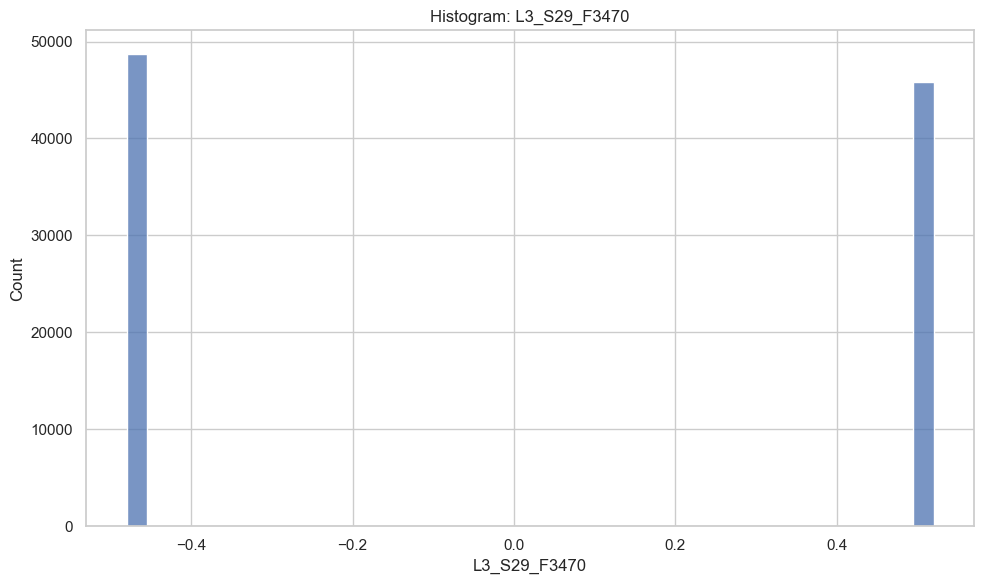

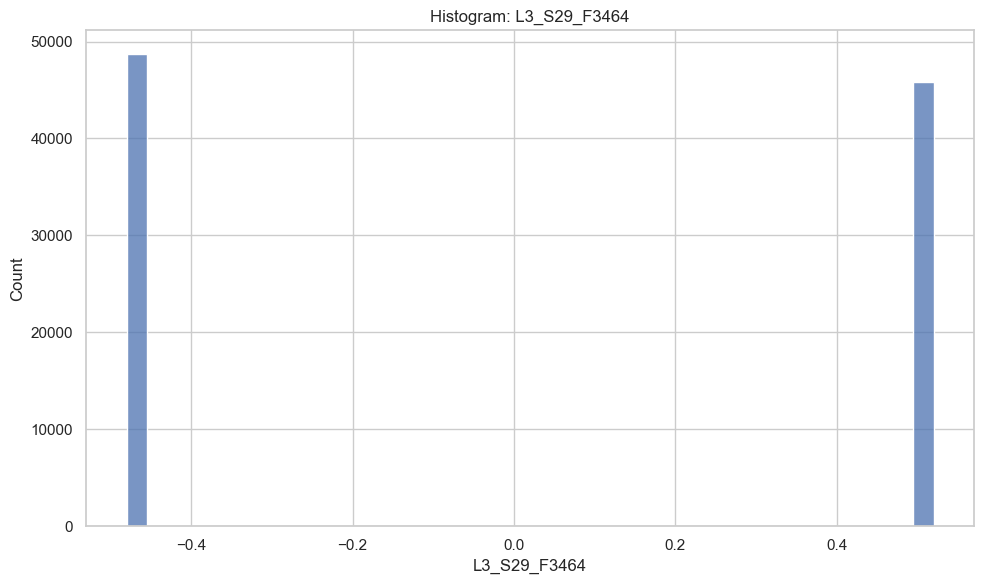

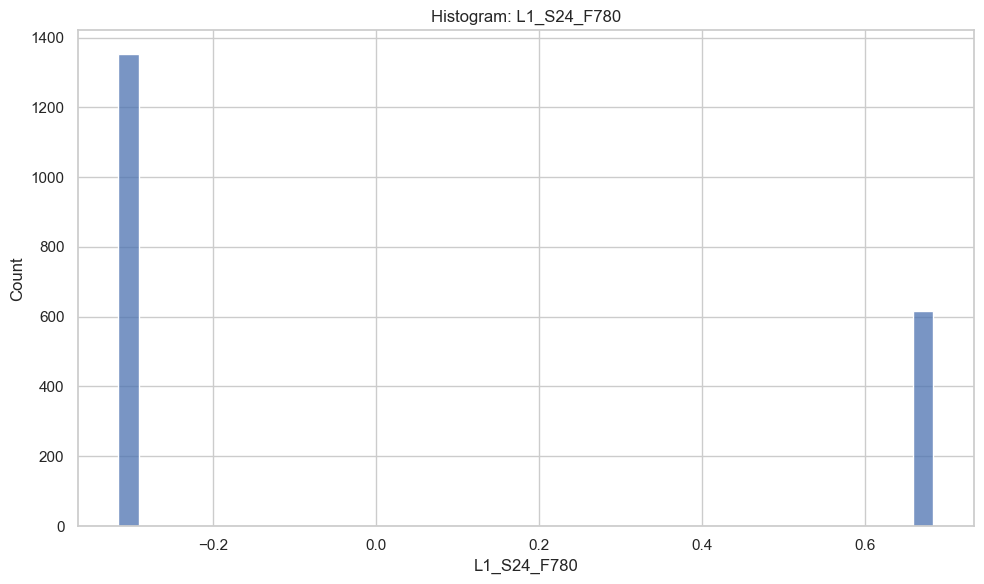

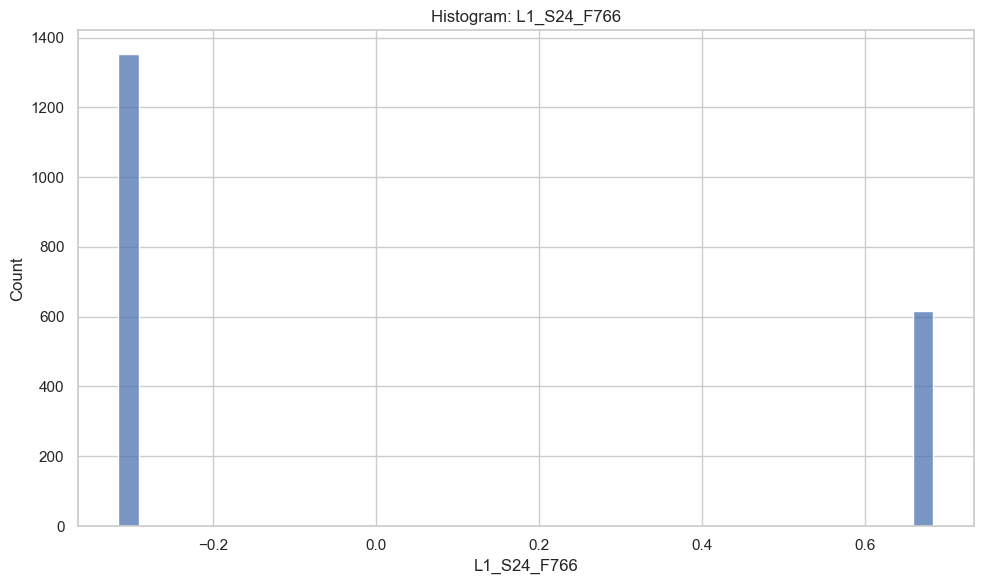

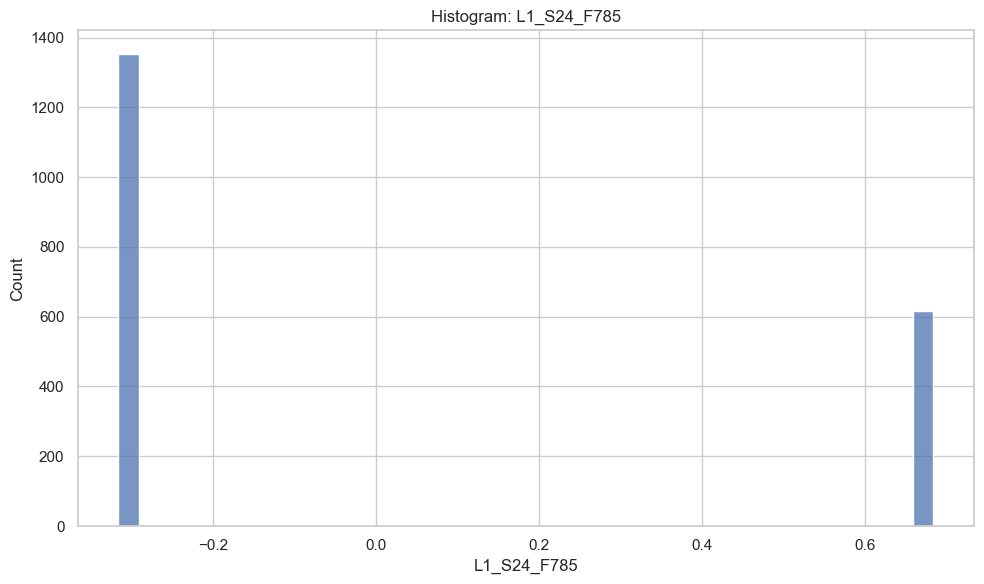

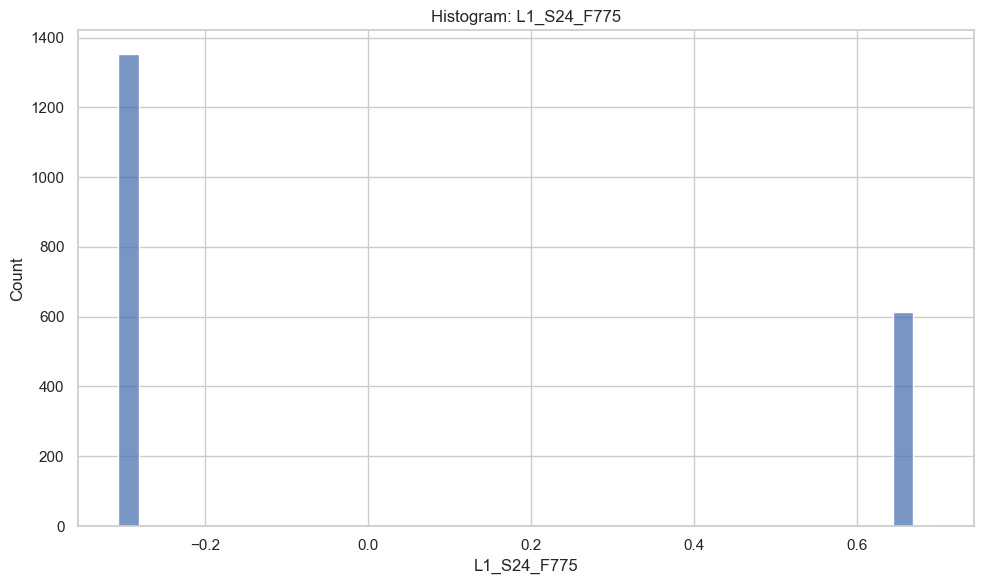

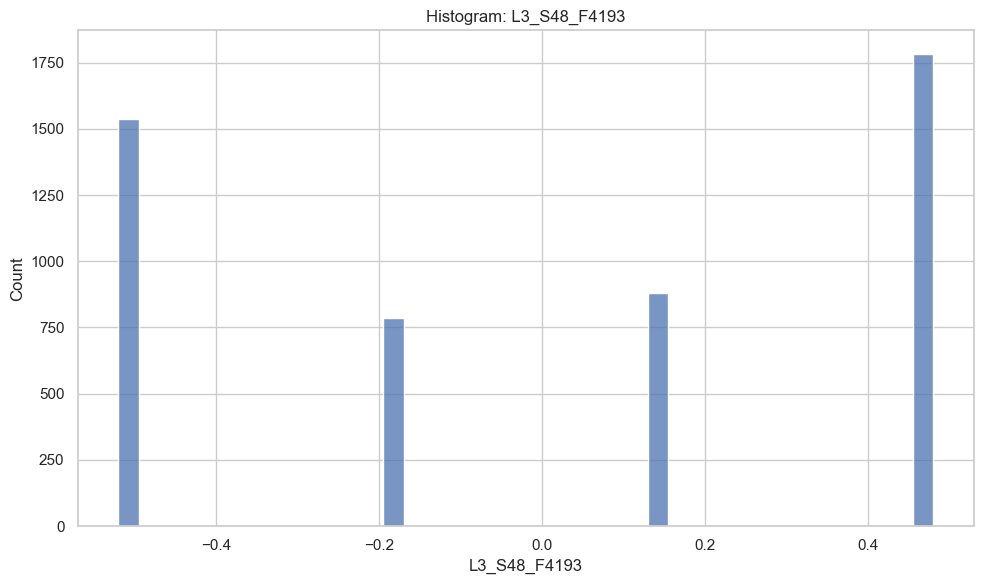

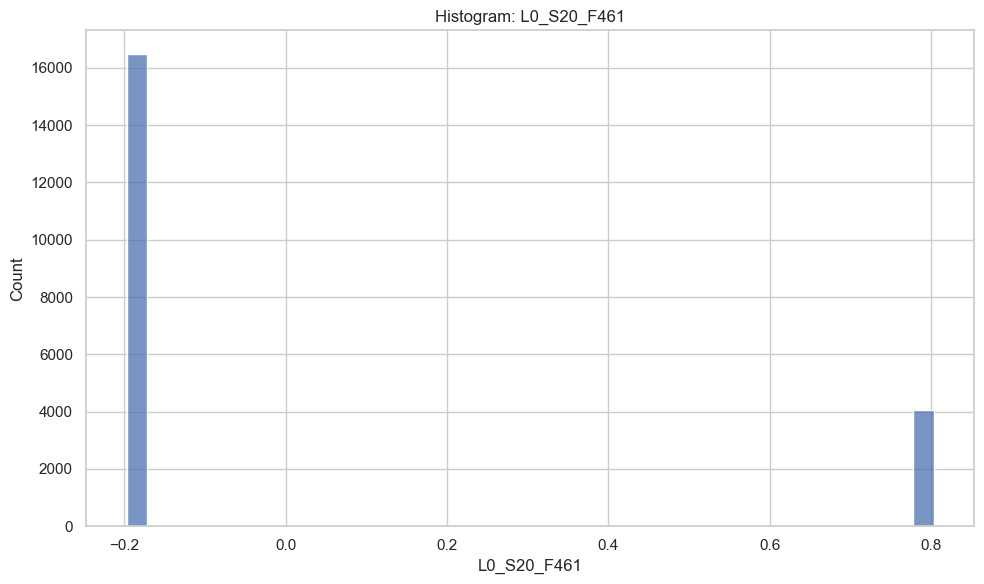

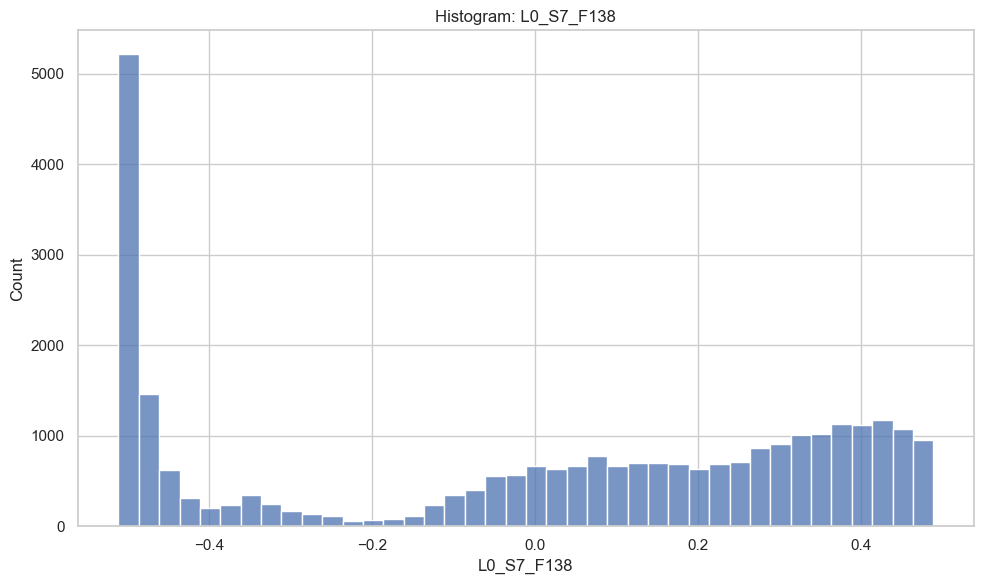

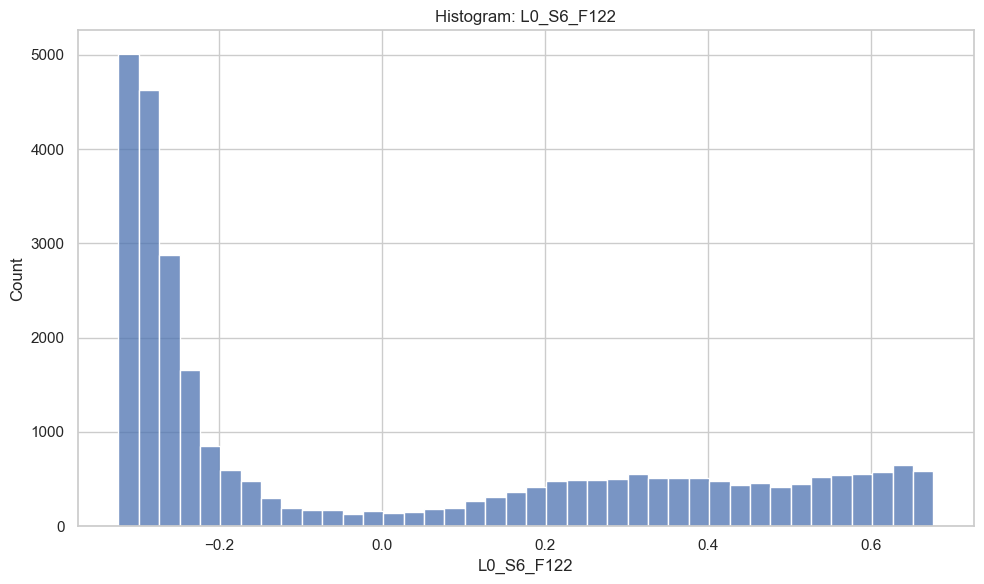

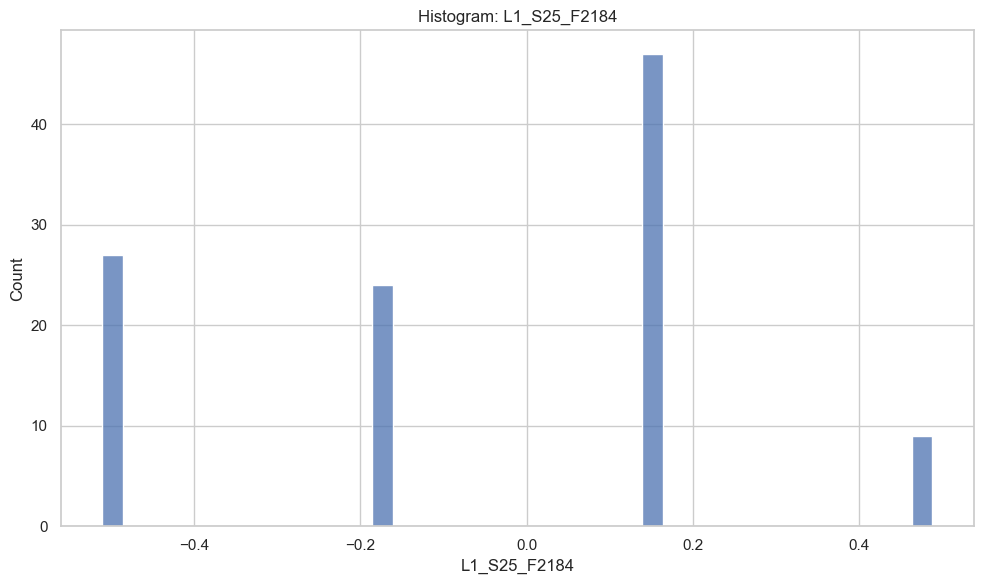

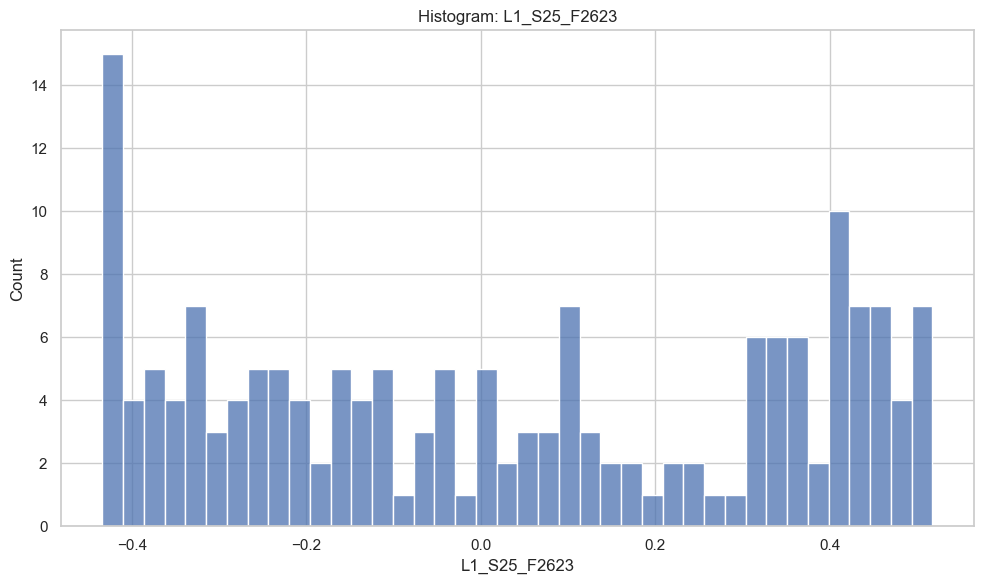

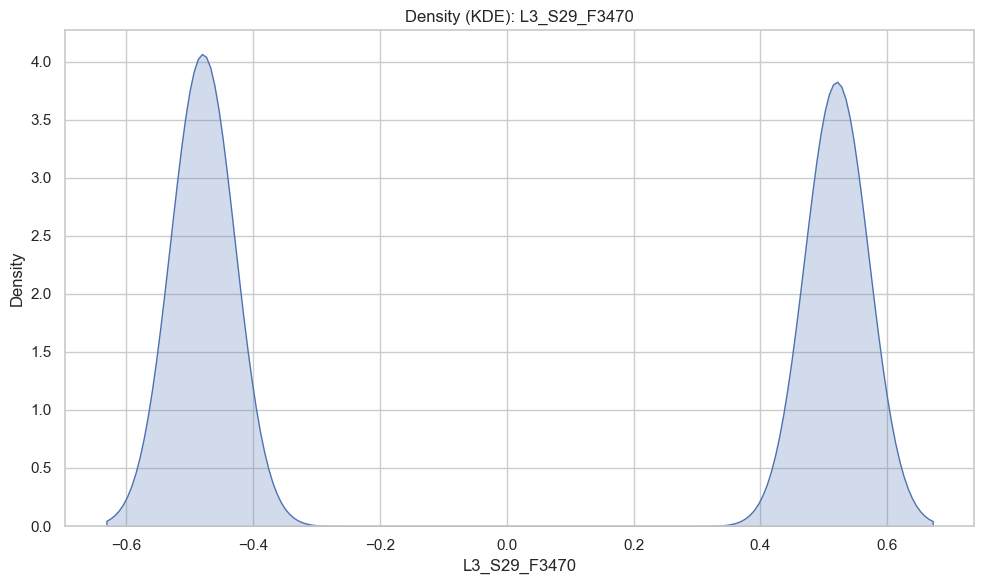

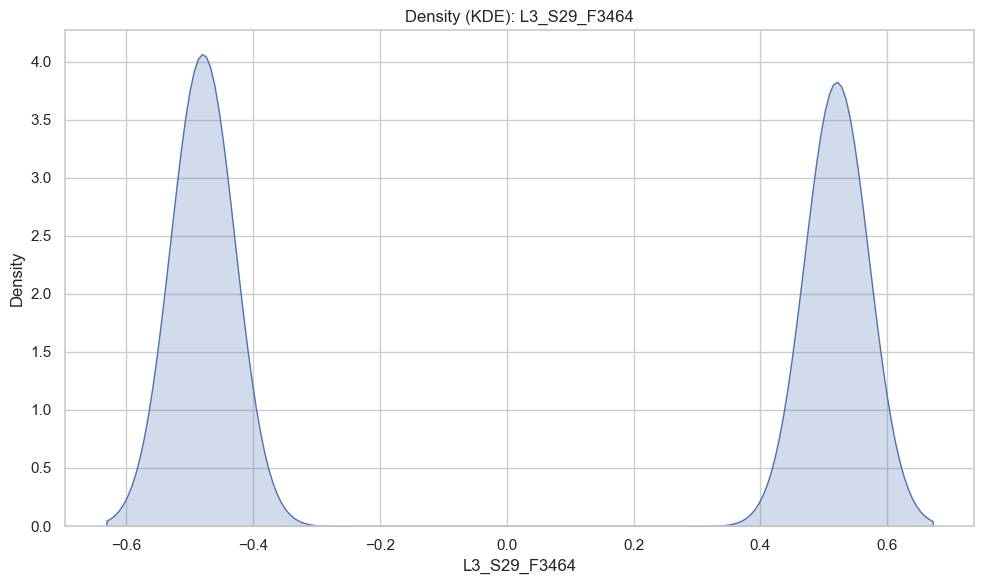

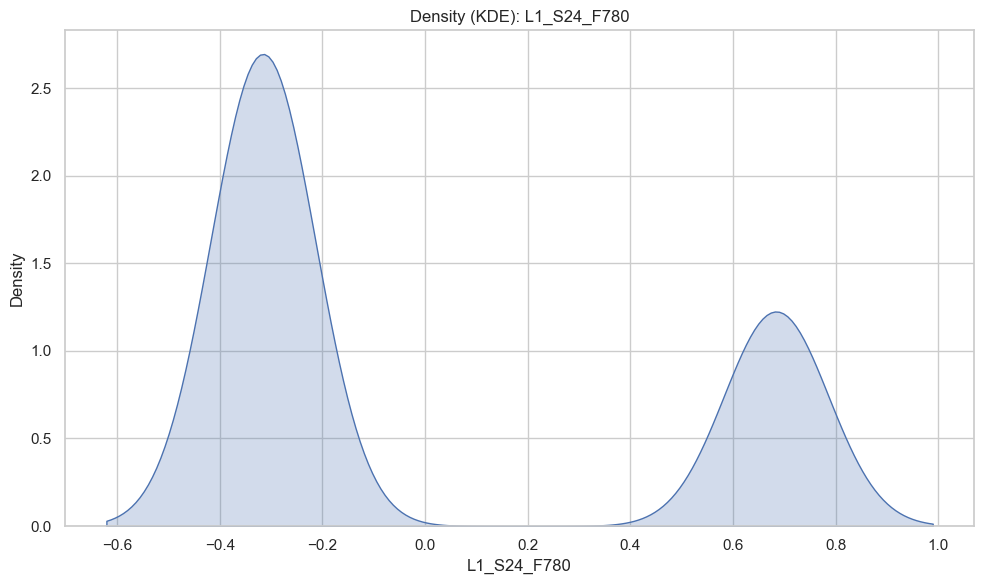

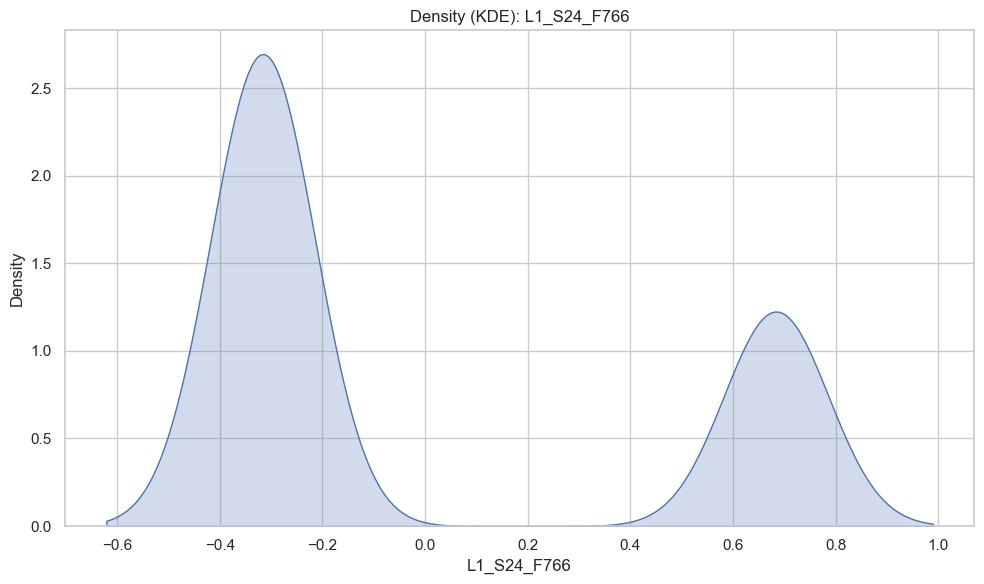

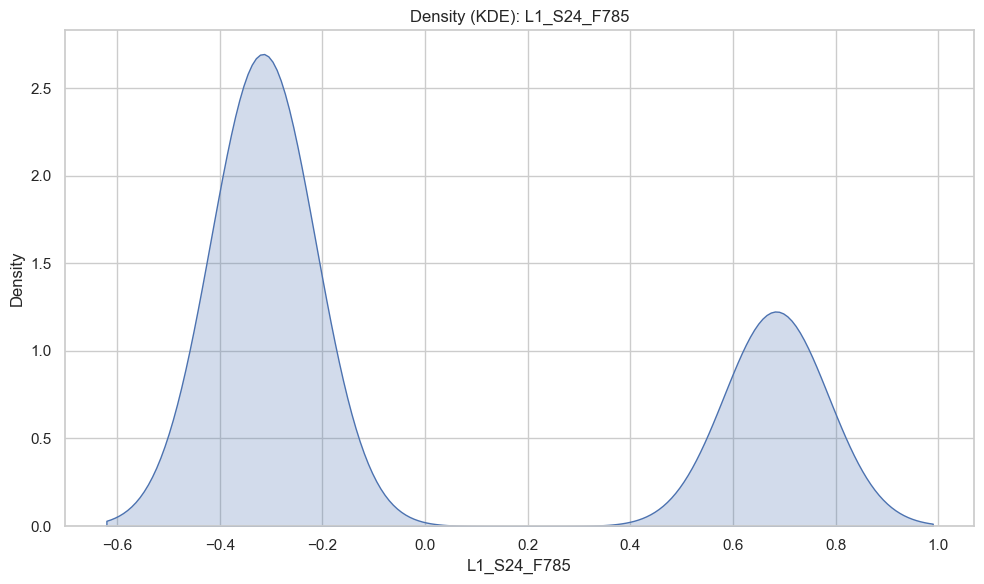

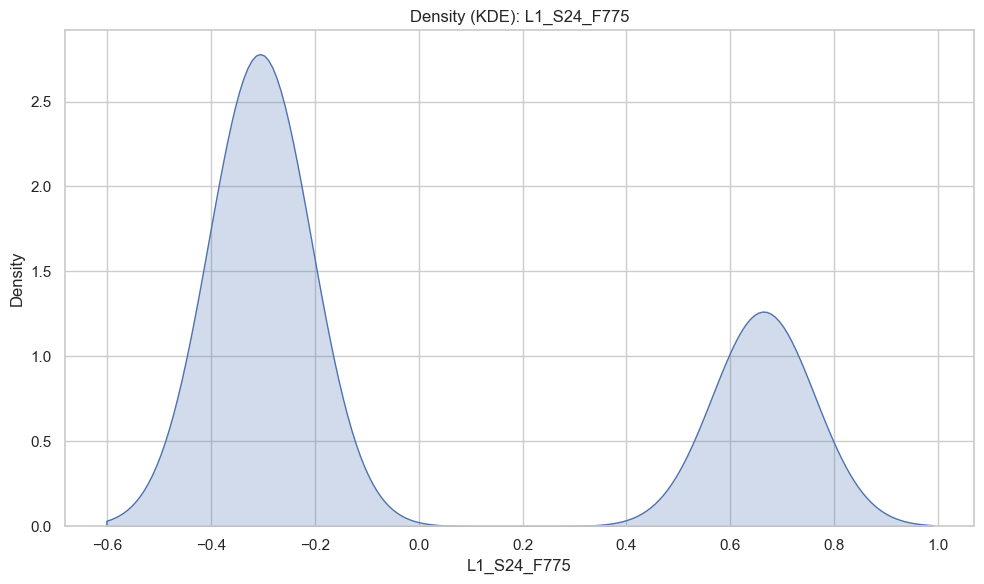

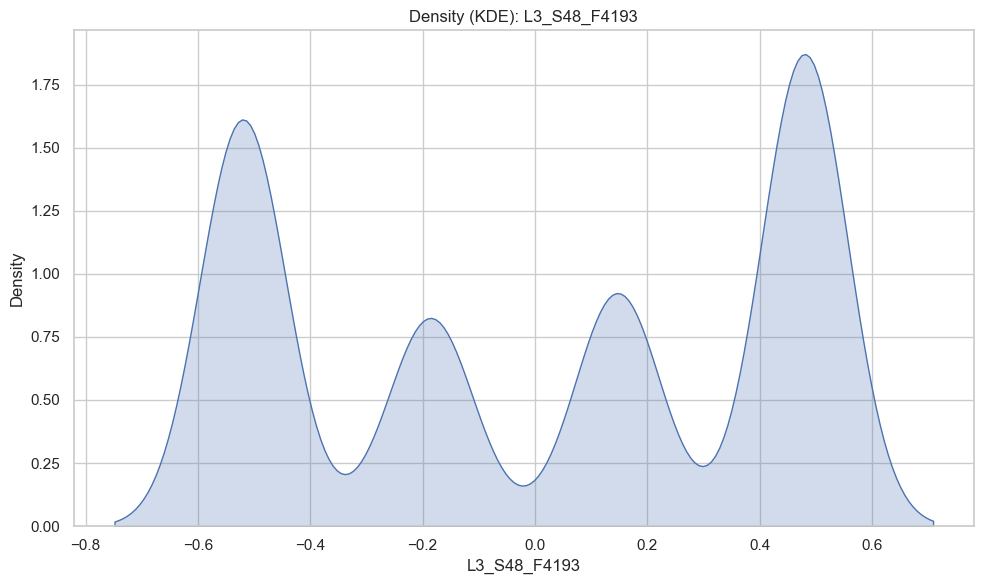

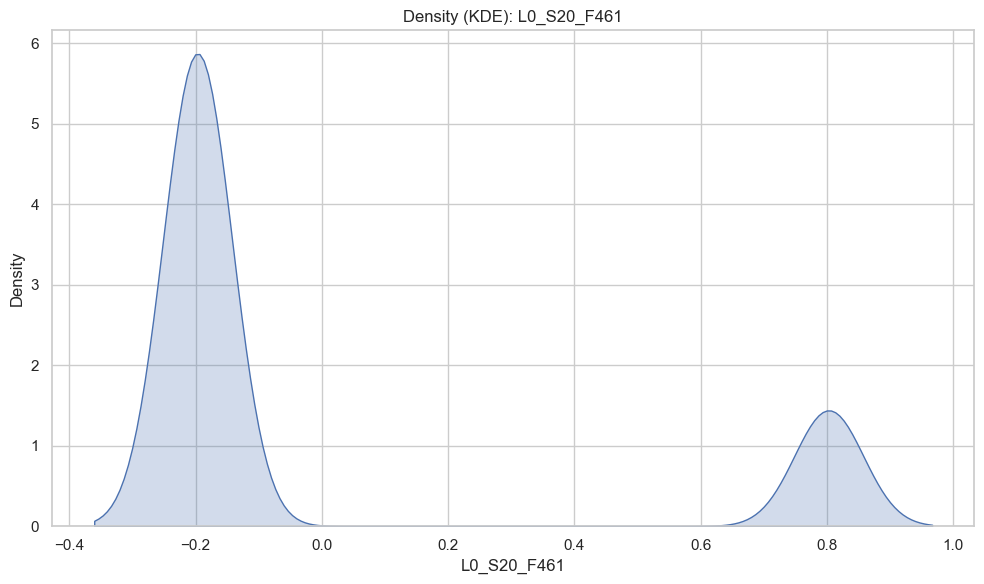

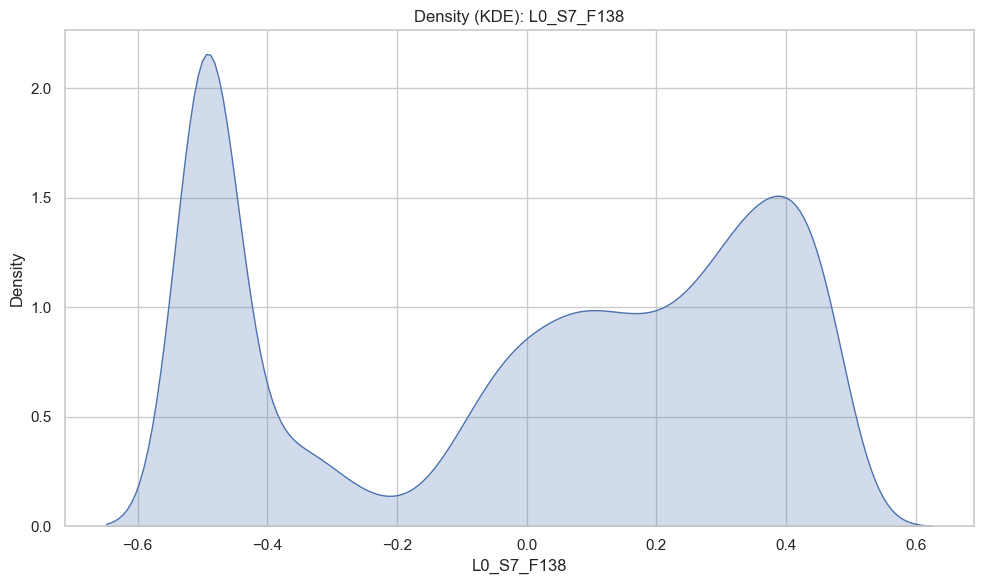

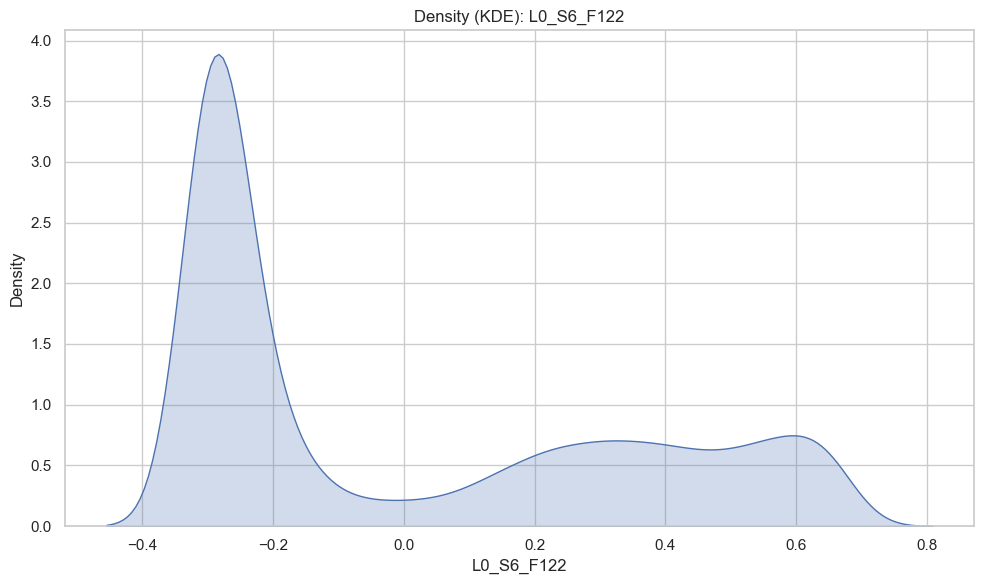

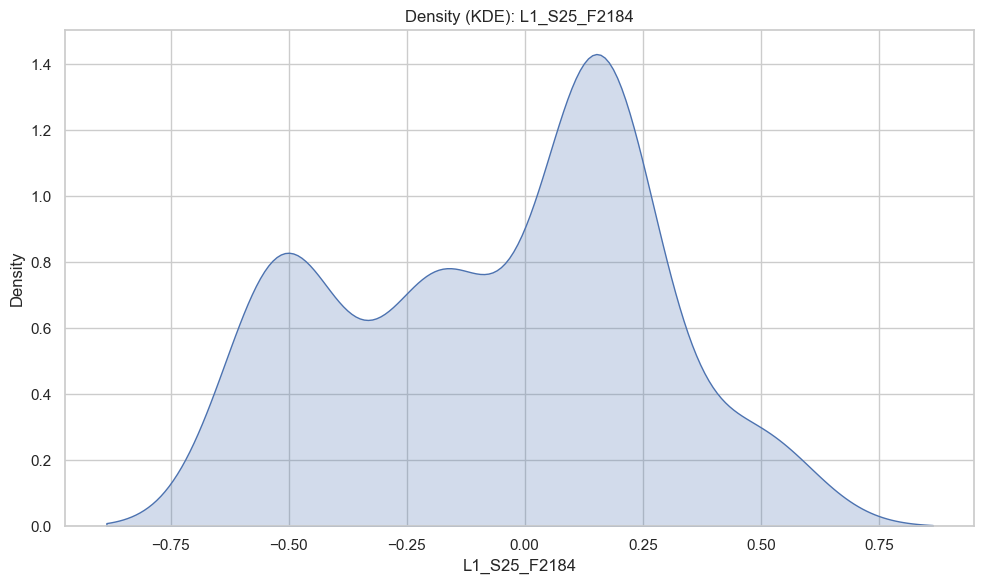

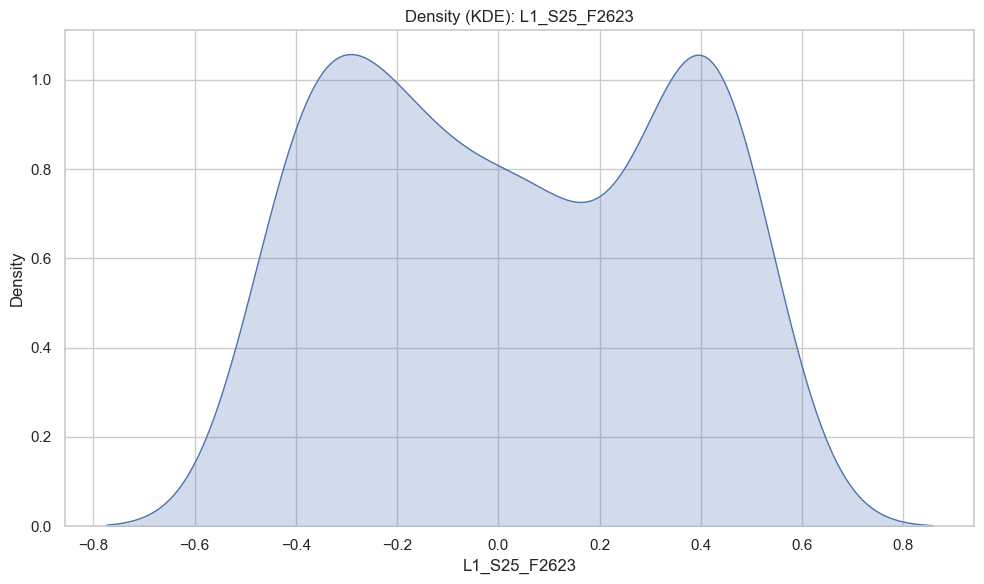

In [59]:
# Choose numeric columns to visualize: top by variance (excluding target)
var_order = num_df[num_cols].var().sort_values(ascending=False)
top_num_for_plots = var_order.head(12).index.tolist()

# Histograms
for col in top_num_for_plots:
    plt.figure()
    sns.histplot(num_df[col], bins=40, kde=False)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Density/KDE plots
for col in top_num_for_plots:
    plt.figure()
    sns.kdeplot(num_df[col].dropna(), fill=True)
    plt.title(f"Density (KDE): {col}")
    plt.xlabel(col); plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


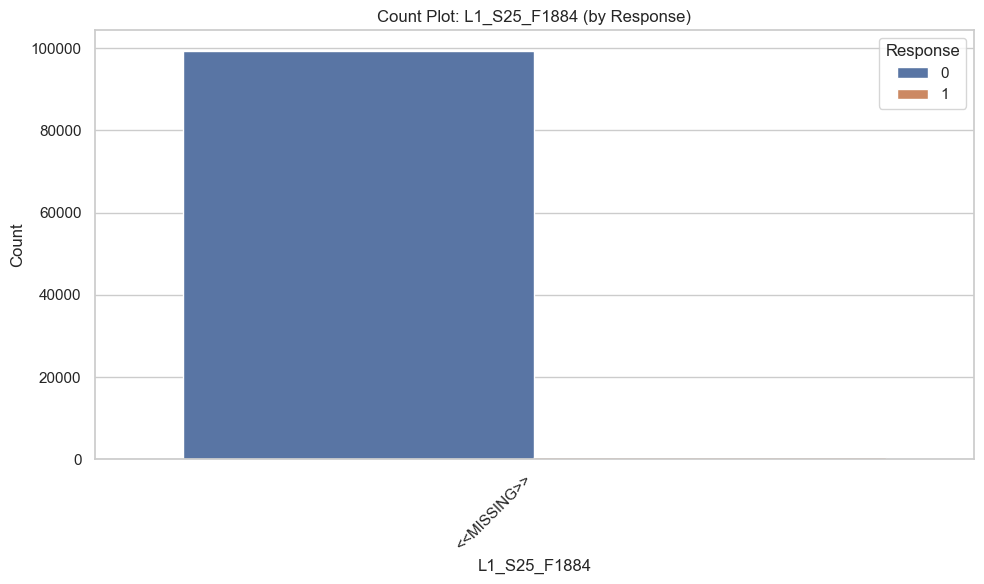

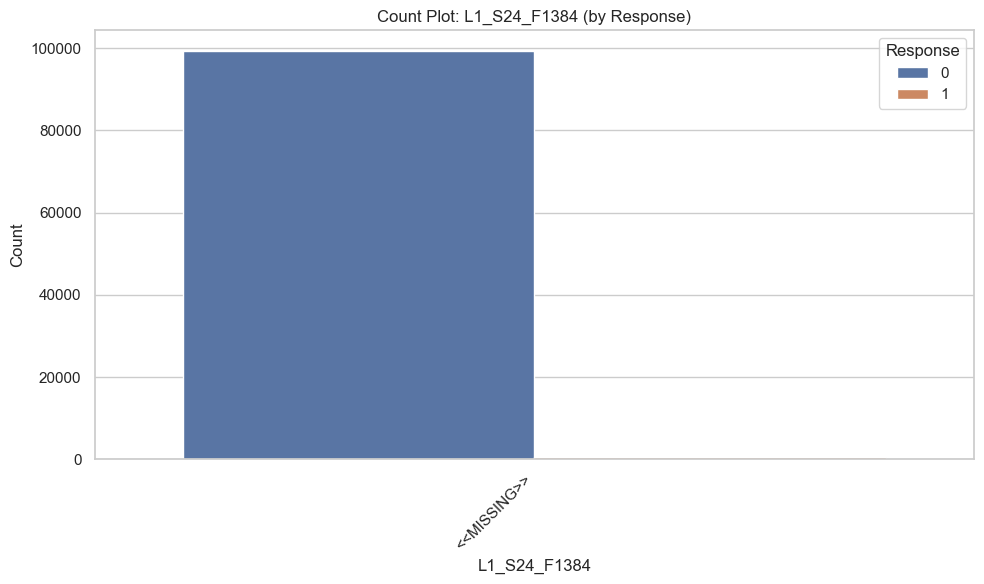

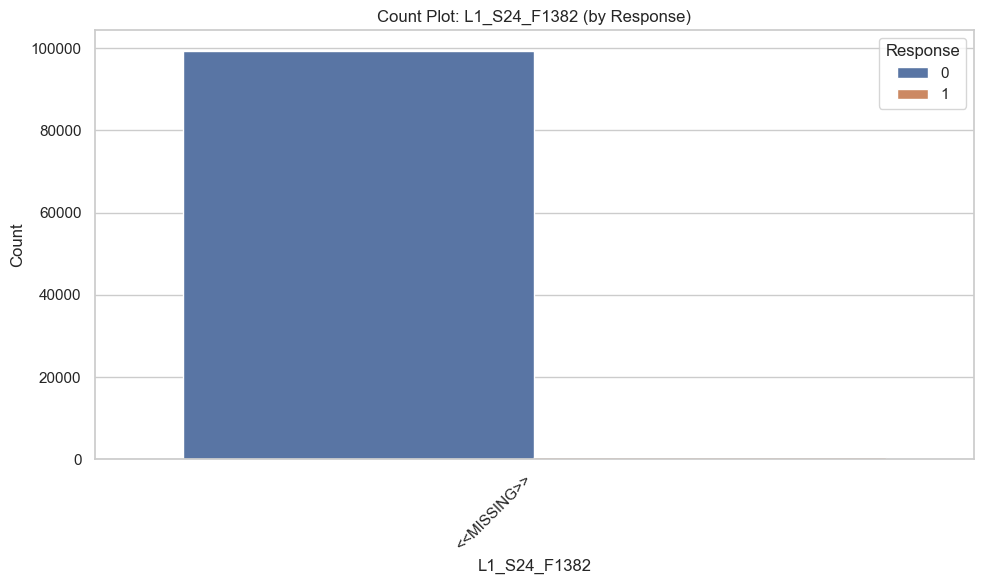

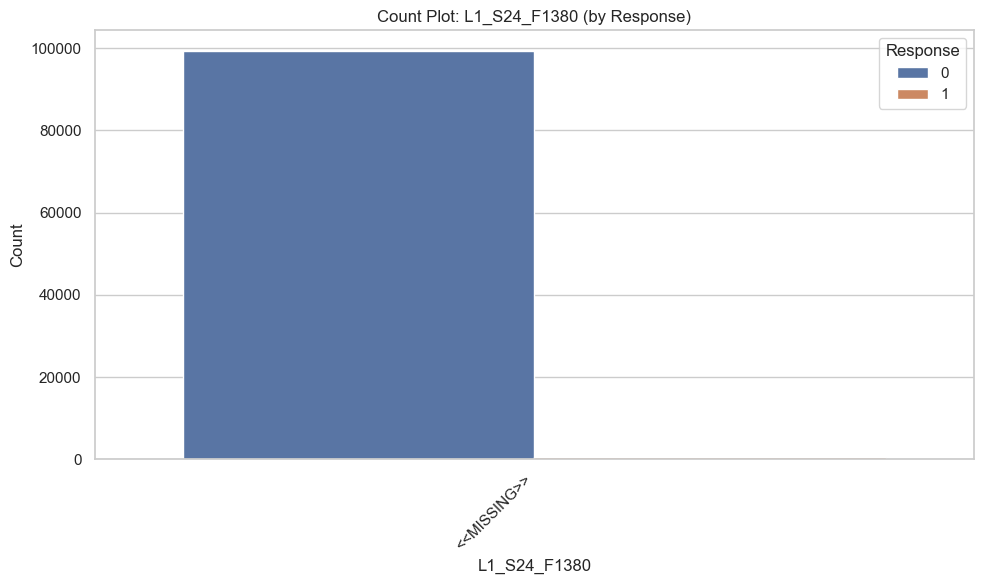

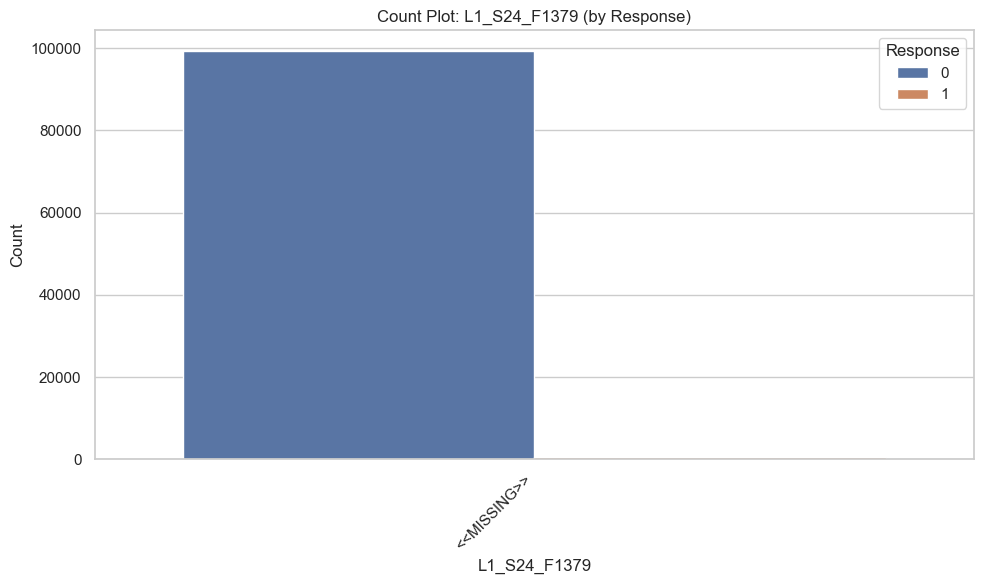

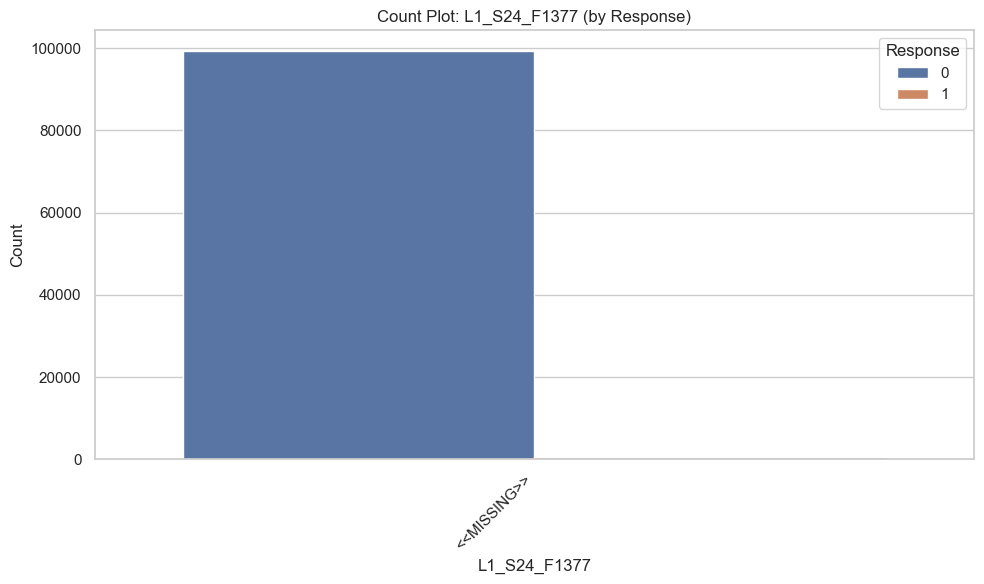

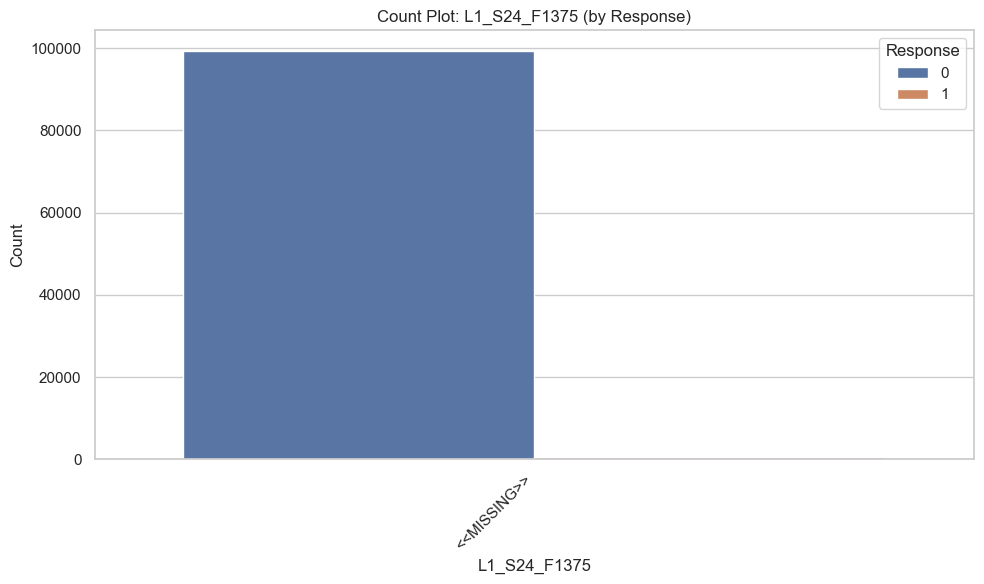

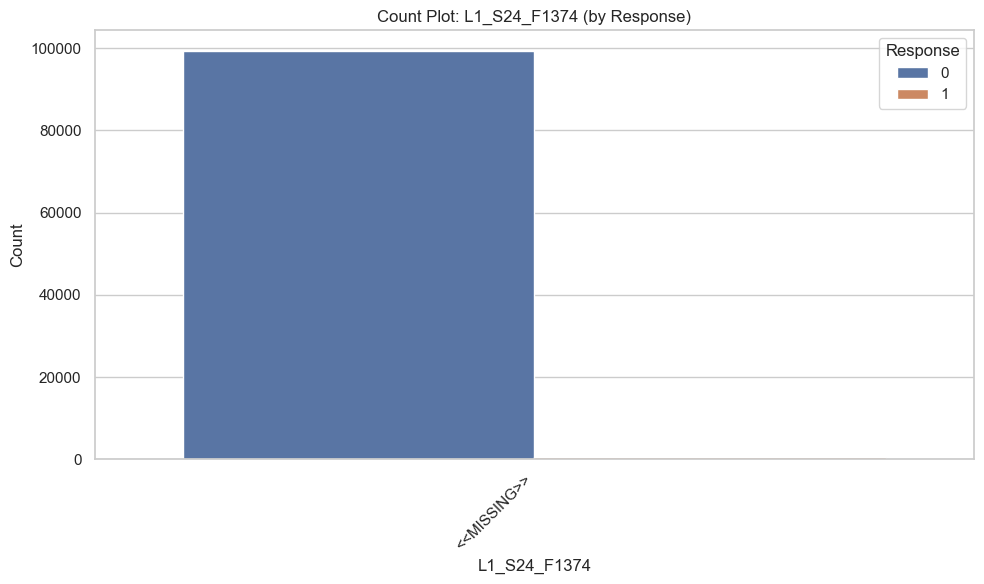

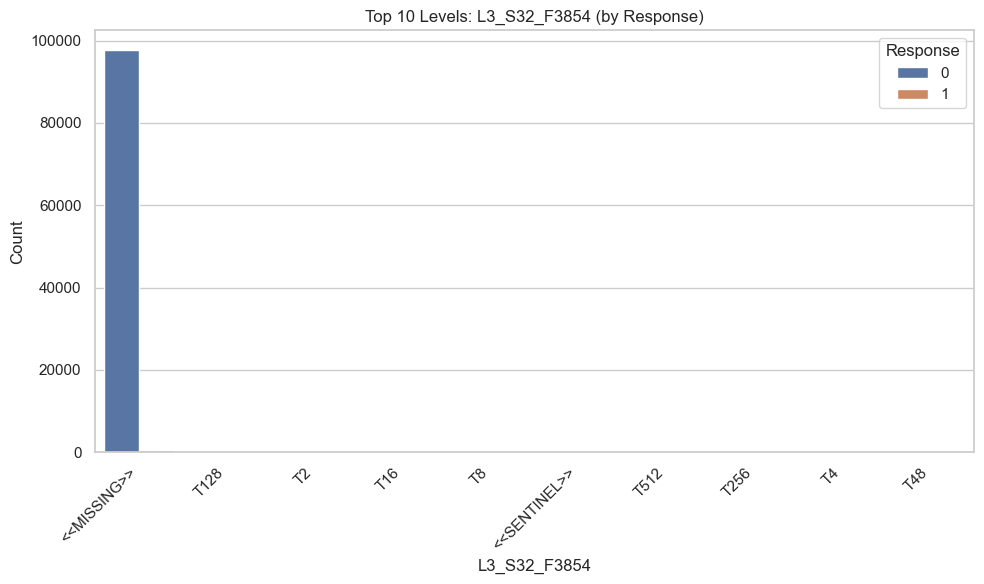

In [61]:
import re

# Function to clean/sanitize categorical values
def clean_categorical(s: pd.Series) -> pd.Series:
    # Convert to pandas' nullable string dtype
    s = s.astype("string")

    # Replace NaN/None with a label
    s = s.fillna("<<MISSING>>")

    # Based on my research of papers, Bosch often uses "T-2147483648" as a sentinel; normalize any "T-<huge int>" patterns
    s = s.str.replace(r"^T-?\d{5,}$", "<<SENTINEL>>", regex=True)

    # Trim super long tokens (optional, for axis labels)
    s = s.str.slice(0, 60)

    return s

# Choose columns to plot: small-cardinality first
cardinality = cat_df.nunique(dropna=False).sort_values()
cat_for_plots = [c for c in cardinality.index if cardinality[c] <= 15][:8]  # up to 8

# Plot small-cardinality columns
for col in cat_for_plots:
    col_series = clean_categorical(cat_df[col])
    order = col_series.value_counts(dropna=False).index.tolist() 

    plt.figure()
    if 'Response' in num_df.columns:
        tmp = pd.DataFrame({
            col: col_series,
            'Response': num_df['Response']
        })
        sns.countplot(data=tmp, x=col, hue='Response', order=order)
        plt.title(f"Count Plot: {col} (by Response)")
        plt.legend(title="Response")
    else:
        tmp = pd.DataFrame({col: col_series})
        sns.countplot(data=tmp, x=col, order=order)
        plt.title(f"Count Plot: {col}")

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# High-cardinality columns: top-k only
topk = 10
high_card_cols = [c for c in cat_df.columns if cat_df[c].nunique(dropna=False) > 15][:6]

for col in high_card_cols:
    col_series = clean_categorical(cat_df[col])
    top_levels = col_series.value_counts(dropna=False).head(topk).index.tolist()
    mask = col_series.isin(top_levels)

    plt.figure()
    if 'Response' in num_df.columns:
        tmp = pd.DataFrame({
            col: col_series[mask],
            'Response': num_df.loc[mask, 'Response']
        })
        sns.countplot(data=tmp, x=col, hue='Response', order=top_levels)
        plt.title(f"Top {topk} Levels: {col} (by Response)")
        plt.legend(title="Response")
    else:
        tmp = pd.DataFrame({col: col_series[mask]})
        sns.countplot(data=tmp, x=col, order=top_levels)
        plt.title(f"Top {topk} Levels: {col}")

    plt.xlabel(col); plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



## Correlations (numeric)
## Full correlation matrices with thousands of columns are unwieldy. So, I did two things:
- Correlation with the target (absolute value sorted).
- A heatmap slice on the top‐k correlated features (or top variance features).

,corr_with_target,abs_corr
L1_S24_F867,-0.244289,0.244289
L1_S24_F1723,-0.206674,0.206674
L1_S25_F2443,-0.174203,0.174203
L1_S24_F839,-0.170487,0.170487
L1_S25_F2365,0.169412,0.169412
L1_S24_F1695,-0.157443,0.157443
L1_S24_F902,-0.144013,0.144013
L3_S49_F4216,-0.137602,0.137602
L3_S40_F3994,0.133962,0.133962
L1_S24_F1000,0.121811,0.121811


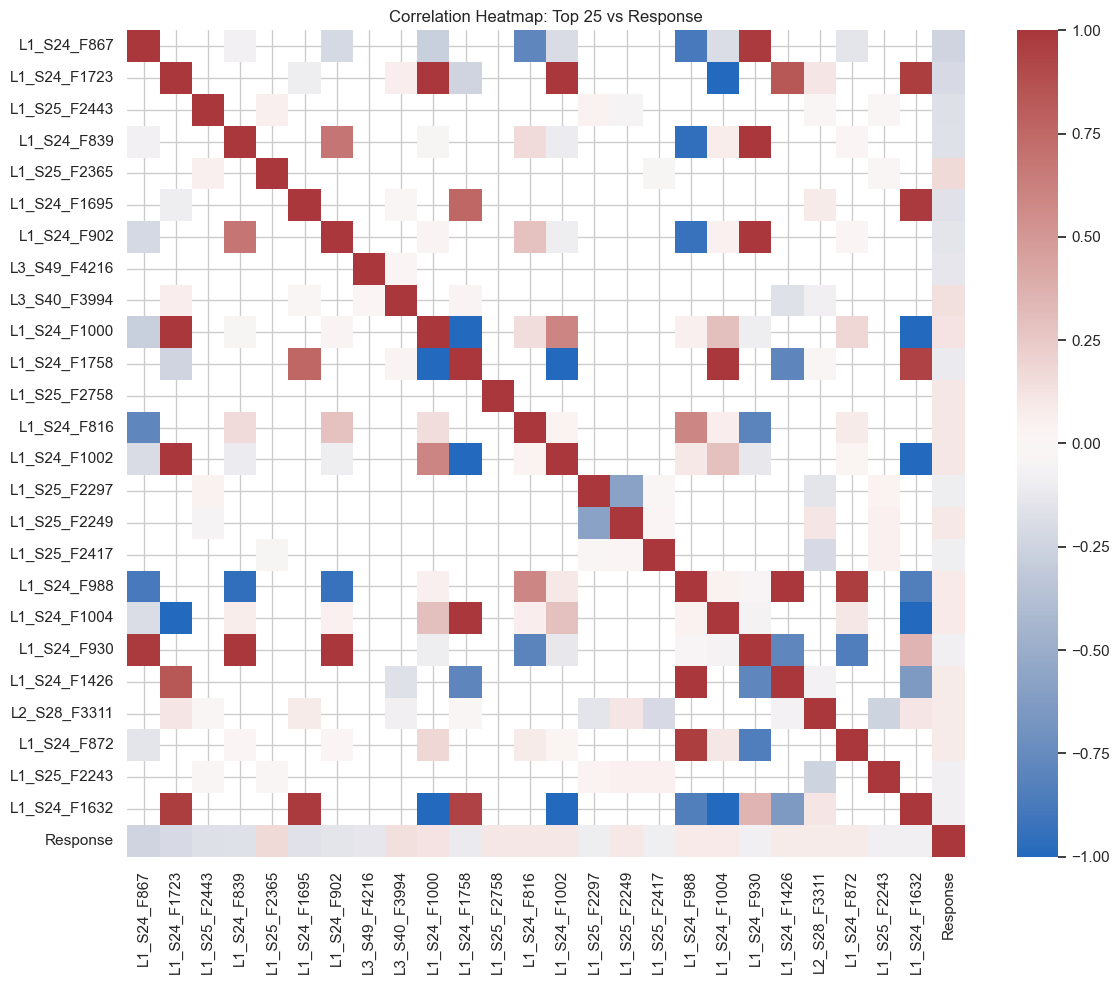

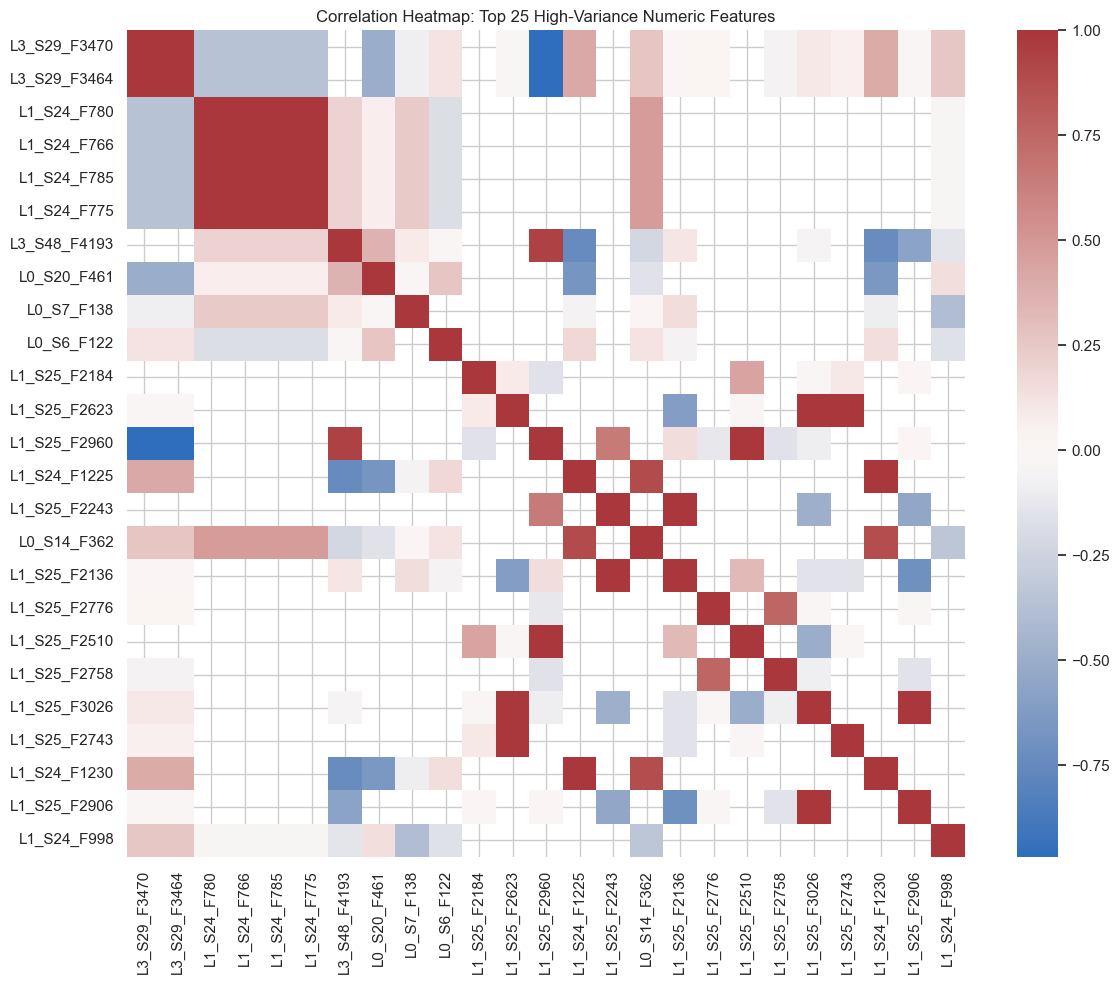

In [69]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) #ignore some warnings where numbers are divided by NaN

# Correlation with target
if target_col is not None:
    # Pearson (fast); Spearman is robust to monotonic but slower
    target_corr = num_df[num_cols].corrwith(num_df[target_col]).dropna().to_frame('corr_with_target')
    target_corr['abs_corr'] = target_corr['corr_with_target'].abs()
    target_corr = target_corr.sort_values('abs_corr', ascending=False)
    display(target_corr.head(30))

    # Heatmap for top-k correlated features (plus target)
    topk = 25
    top_feats = target_corr.head(topk).index.tolist()
    corr_slice = num_df[top_feats + [target_col]].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_slice, annot=False, cmap="vlag", center=0)
    plt.title(f"Correlation Heatmap: Top {topk} vs {target_col}")
    plt.tight_layout()
    plt.show()

# Heatmap for a high-variance subset (if no target or additionally)
hv_topk = 25
hv_cols = var_order.head(hv_topk).index.tolist()
corr_hv = num_df[hv_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_hv, annot=False, cmap="vlag", center=0)
plt.title(f"Correlation Heatmap: Top {hv_topk} High-Variance Numeric Features")
plt.tight_layout()
plt.show()


## The correlation heatmap shows strong correlation between some features in Line1 Station 24 for features 766, 780, 785 and 775 for the high variance. In the top 25, there are high negative correlation for F2906 and F2925 all from Line1 and Station 25 suggesting some inverse correlation. 

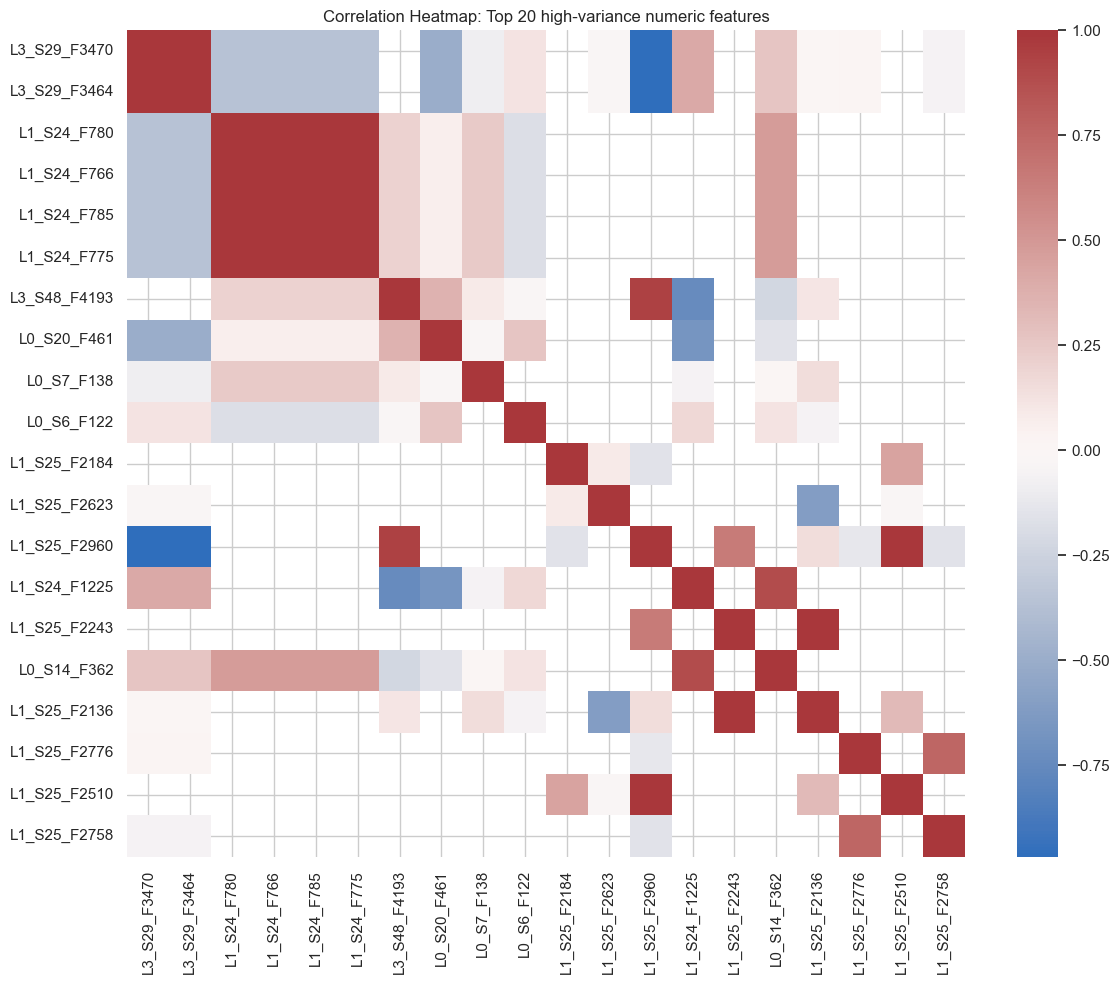

In [71]:
# Bivariate Analysis
# Correlation Matrix (numeric data only)
corr = num_df[num_df.columns.drop('Response', errors='ignore')].corr()

# Heatmap of top 20 high-variance features
topk = 20
top_feats = num_df.var().sort_values(ascending=False).head(topk).index
corr_slice = num_df[top_feats].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_slice, cmap="vlag", center=0)
plt.title(f"Correlation Heatmap: Top {topk} high-variance numeric features")
plt.tight_layout()
plt.show()


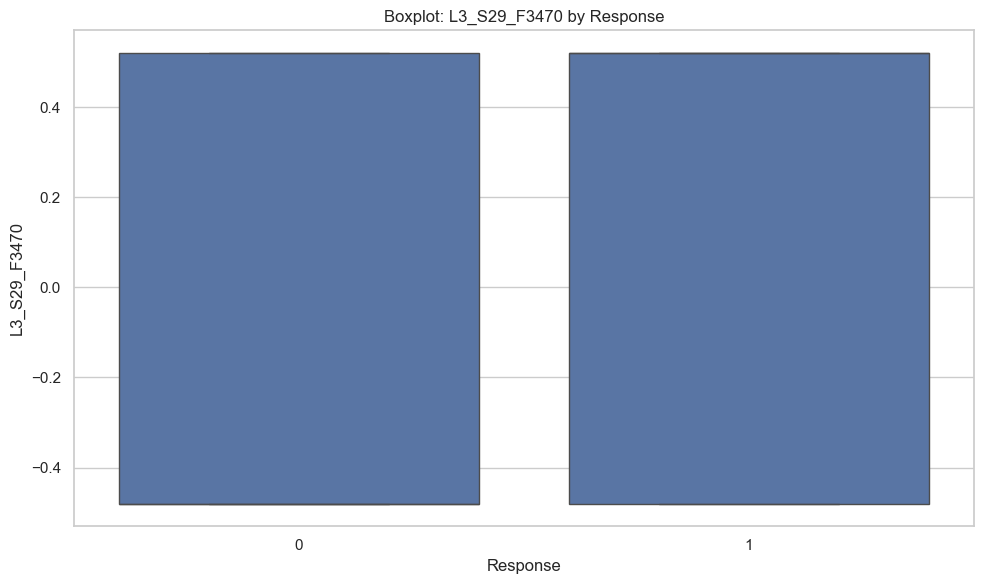

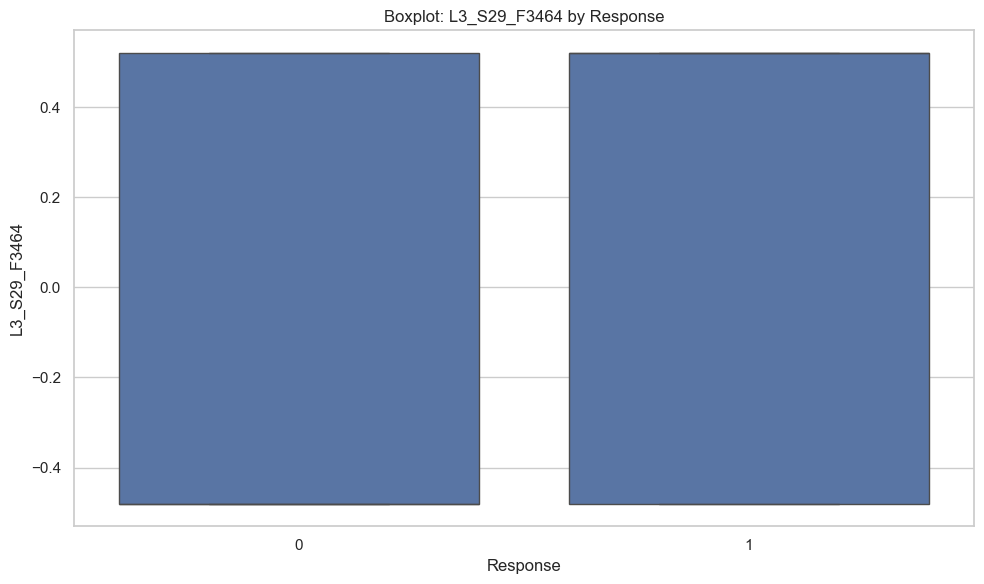

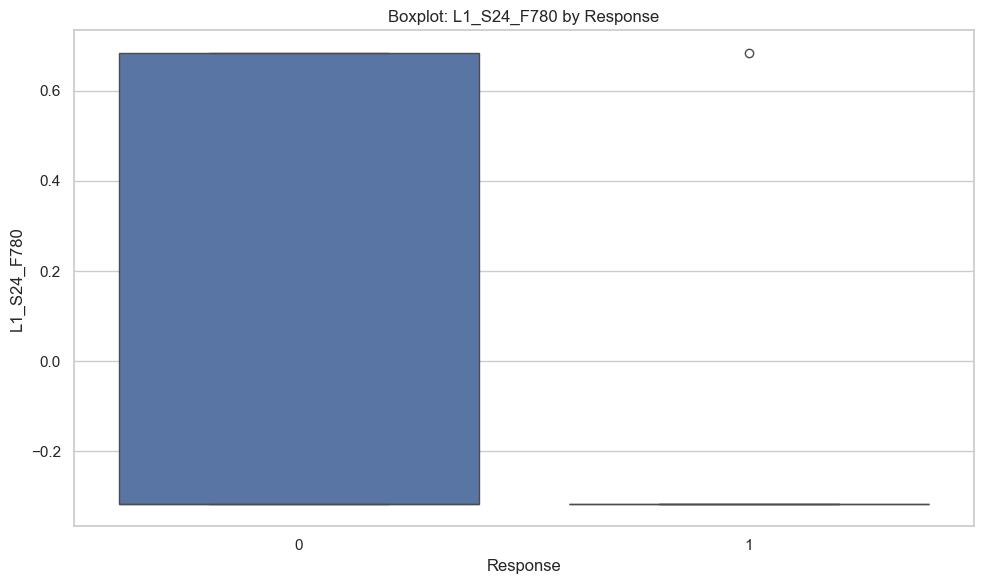

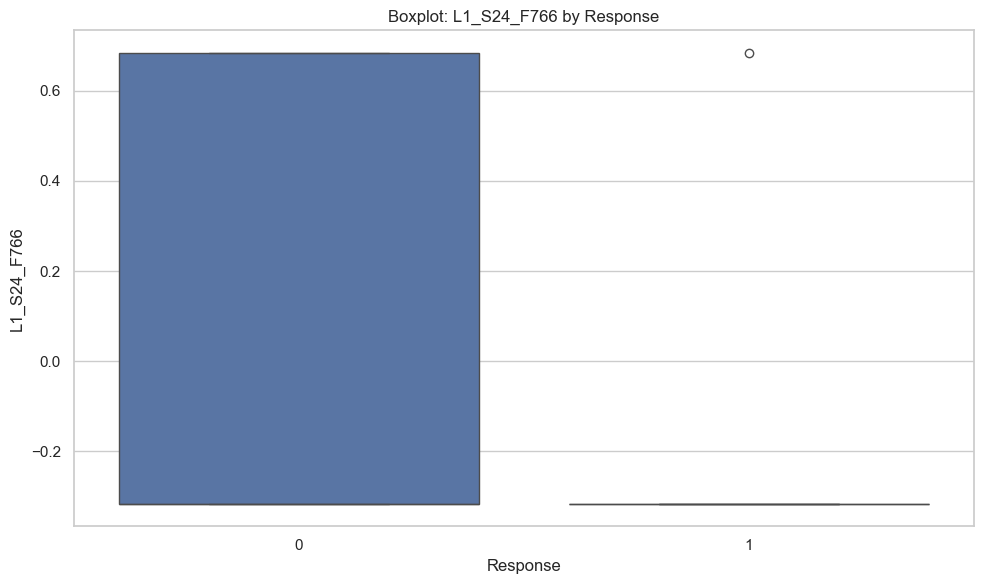

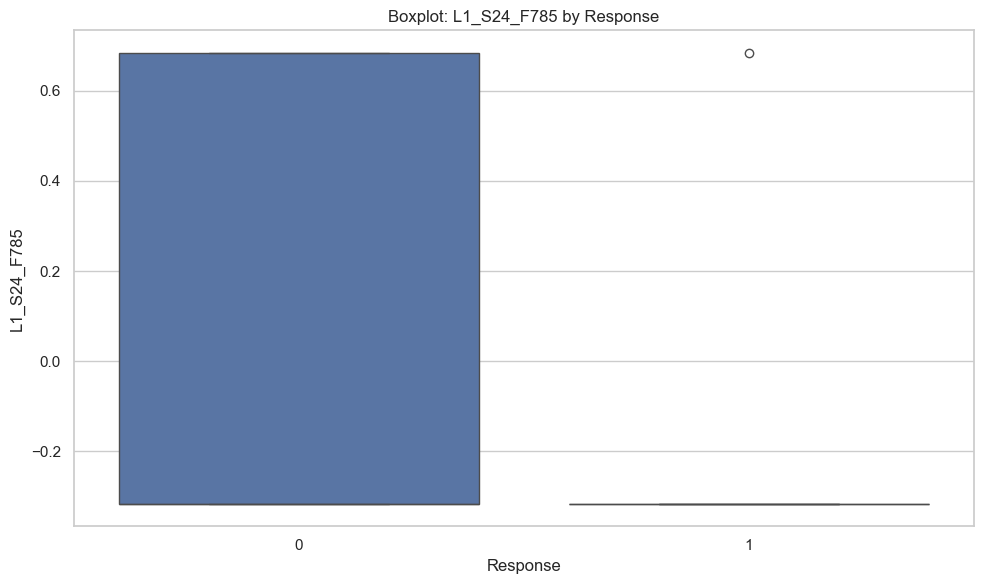

In [73]:
# Box Plots - comparing numeric vs categorical.
# Choose a few numeric features with high variance
num_cols = num_df.drop(columns='Response', errors='ignore').var().sort_values(ascending=False).head(5).index

for col in num_cols:
    plt.figure()
    sns.boxplot(data=num_df, x='Response', y=col)
    plt.title(f"Boxplot: {col} by Response")
    plt.tight_layout()
    plt.show()


## Just looking at the 5 boxplot shows trends that some stations and specific features have almost a 50%-50% pass or fail rate. While other features show a much higher failure rate. 

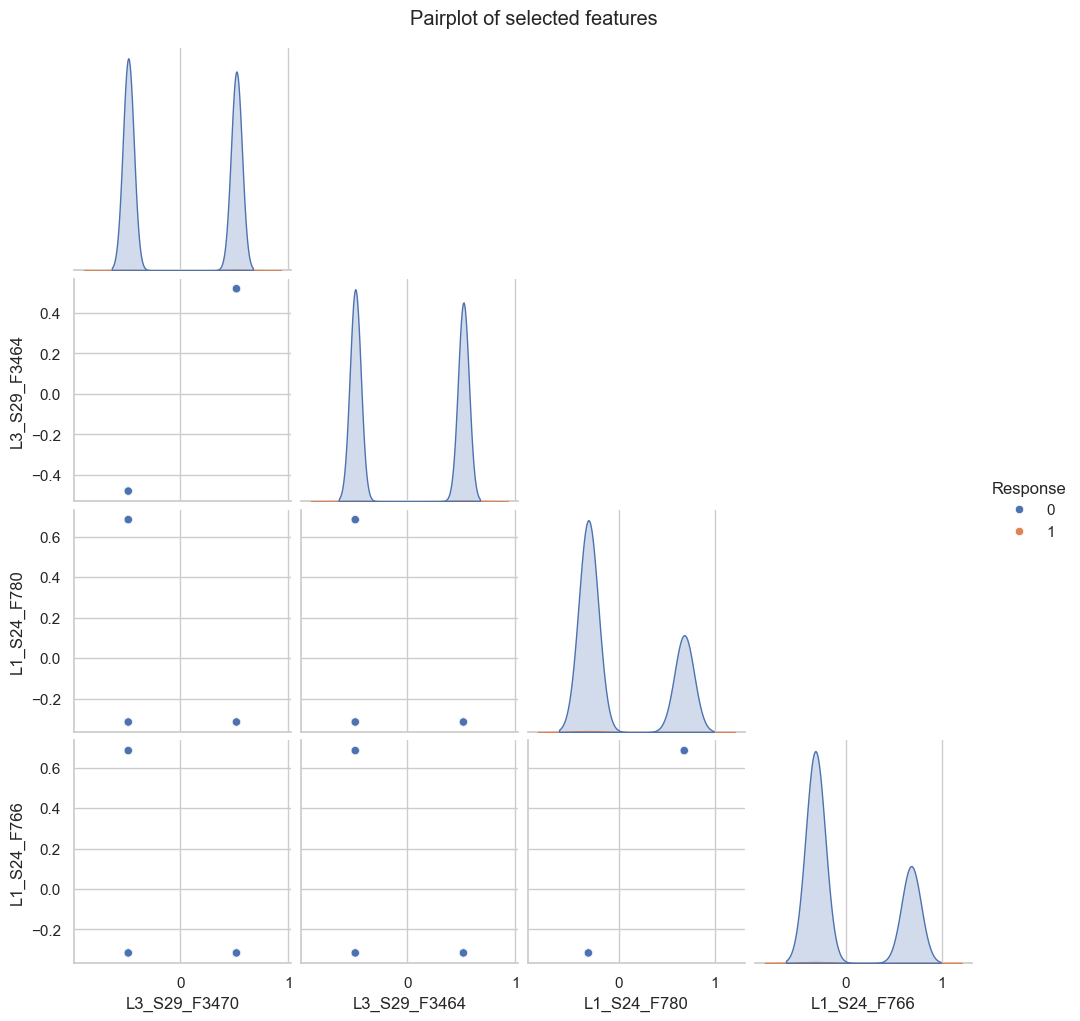

In [75]:
# Multivariate Analysis - 3 plus variable interactions
# Pairplot (scatterplot matrix)
subset_cols = num_cols[:4].tolist() + ['Response']  # 4 numeric + Response
sns.pairplot(num_df[subset_cols], hue='Response', diag_kind="kde", corner=True)
plt.suptitle("Pairplot of selected features", y=1.02)
plt.show()


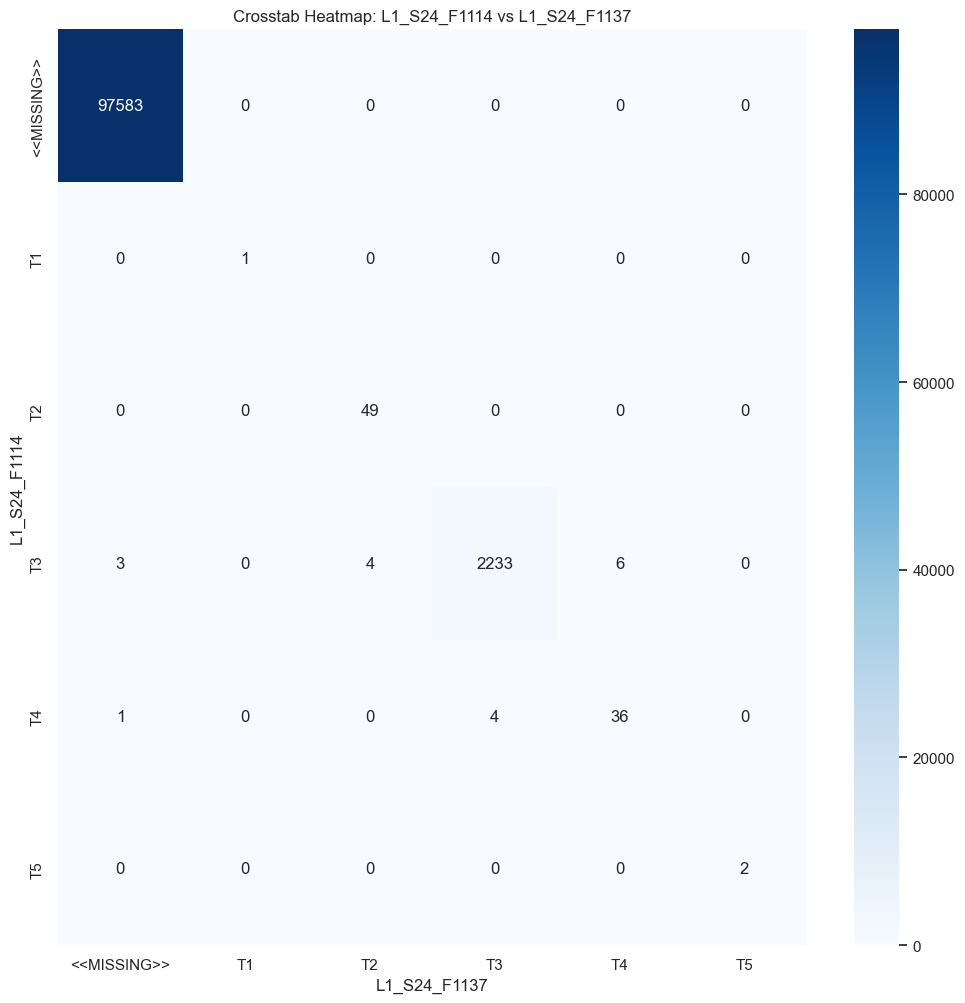

In [77]:
# Heatmap of Feature vs Feature by Target
# Cross-tab of two categorical cols (if any low-cardinality ones exist)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sanitize categorical values
def clean_categorical(s: pd.Series) -> pd.Series:
    s = s.astype("string").fillna("<<MISSING>>")
    s = s.str.replace(r"^T-?\d{5,}$", "<<SENTINEL>>", regex=True)
    s = s.str.slice(0, 60)
    return s

# Choose two safe categorical columns
def pick_two_cats(df_cat: pd.DataFrame,
                  max_card_each: int = 12,
                  min_non_null: int = 2000) -> list:
    candidates = []
    for c in df_cat.columns:
        s = df_cat[c]
        nunq = s.nunique(dropna=True)
        nn = s.notna().sum()
        if 2 <= nunq <= max_card_each and nn >= min_non_null:
            candidates.append(c)
    # Fallback: relax min_non_null if nothing found
    if len(candidates) < 2:
        for c in df_cat.columns:
            s = df_cat[c]
            nunq = s.nunique(dropna=True)
            nn = s.notna().sum()
            if 2 <= nunq <= max_card_each and nn >= 100:  # looser
                candidates.append(c)
                if len(candidates) >= 2:
                    break
    return candidates[:2]

# Build a non-empty crosstab with optional top-K levels
def crosstab_topk(df_cat: pd.DataFrame, col_a: str, col_b: str, topk: int = None) -> pd.DataFrame:
    a = clean_categorical(df_cat[col_a])
    b = clean_categorical(df_cat[col_b])

    if topk is not None:
        a_top = a.value_counts(dropna=False).head(topk).index
        b_top = b.value_counts(dropna=False).head(topk).index
        mask = a.isin(a_top) & b.isin(b_top)
        a = a[mask]; b = b[mask]

    ct = pd.crosstab(a, b, dropna=False)  
    # Remove rows/cols that are entirely zero
    ct = ct.loc[ct.sum(axis=1) > 0, ct.sum(axis=0) > 0]
    return ct

# Plot heatmap
def plot_heatmap_safe(df: pd.DataFrame, title: str, fmt="d", cmap="Blues"):
    if df.size == 0 or df.shape[0] == 0 or df.shape[1] == 0:
        print(f"[skip] Empty crosstab for: {title}")
        return
    plt.figure(figsize=(1.2*len(df.columns)+3, 1.2*len(df.index)+3))
    sns.heatmap(df, annot=True, fmt=fmt, cmap=cmap)
    plt.title(title)
    plt.xlabel(df.columns.name or ""); plt.ylabel(df.index.name or "")
    plt.tight_layout()
    plt.show()

# Use it
# Pick two categorical columns (low-cardinality)
cat_cols = pick_two_cats(cat_df, max_card_each=12, min_non_null=2000)
if len(cat_cols) == 2:
    col_a, col_b = cat_cols
    # basic crosstab
    ct = crosstab_topk(cat_df, col_a, col_b, topk=None)
    plot_heatmap_safe(ct, f"Crosstab Heatmap: {col_a} vs {col_b}")

    # 3) top-K version if cardinality is still big
    if (ct.shape[0] > 20) or (ct.shape[1] > 20):
        ct_top = crosstab_topk(cat_df, col_a, col_b, topk=10)
        plot_heatmap_safe(ct_top, f"Crosstab Heatmap (Top-10): {col_a} vs {col_b}")
else:
    print("[info] Could not find two suitable low-cardinality categorical columns.")



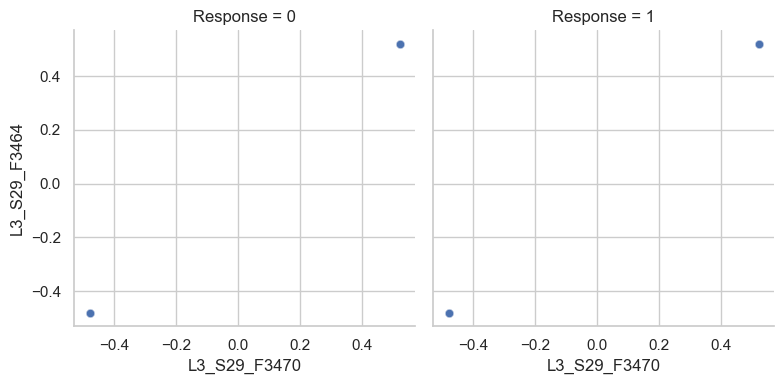

In [79]:
# Multivariate Faceting
# Numeric vs numeric, faceted by Response
if 'Response' in num_df.columns:
    feat_x, feat_y = num_cols[0], num_cols[1]
    g = sns.FacetGrid(num_df, col="Response", height=4)
    g.map_dataframe(sns.scatterplot, x=feat_x, y=feat_y, alpha=0.3)
    g.set_axis_labels(feat_x, feat_y)
    g.set_titles(col_template="Response = {col_name}")
    plt.show()


# Preprocessing
- Categorical to numerical for both the test and train data: One hot encoder
- Numerical data: imputation, standard scaling (since the data sets are separate don't have to worry to do it after the test train split. Can perform the standard scaling on each test and train data set)
- Compare against minimum – maximum scaling
- Unbalanced data - SMOTE (Synthetic Minority Over-sampling Technique) will be investigated later, if needed. 

In [81]:
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Grab the sampled dataframes
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()

test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

# Set 'Id' as index if present (Bosch has Id as first col)
for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

# Separate target and drop it from numeric features 
assert 'Response' in train_num.columns, "Expected 'Response' in train_numerical"
y_train = train_num['Response'].copy()
train_num = train_num.drop(columns=['Response'])

# Align columns & drop all-NaN columns safely
# Ensure test has all train columns (add missing as NaN)
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

# Drop numeric columns that are ALL NaN in TRAIN to avoid imputer errors
all_nan_num_cols = train_num.columns[train_num.isna().all()].tolist()
if all_nan_num_cols:
    train_num = train_num.drop(columns=all_nan_num_cols)
    test_num  = test_num.drop(columns=all_nan_num_cols)

# Keep categorical columns (they can be all-NaN; impute a constant)
# But if a column is entirely missing in BOTH train and test, drop it.
all_nan_cat_cols = train_cat.columns[(train_cat.isna().all()) & (test_cat.isna().all())].tolist()
if all_nan_cat_cols:
    train_cat = train_cat.drop(columns=all_nan_cat_cols)
    test_cat  = test_cat.drop(columns=all_nan_cat_cols)

# Feature lists
numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

# Combine into X dataframes
X_train = pd.concat([train_num, train_cat], axis=1)
X_test  = pd.concat([test_num,  test_cat],  axis=1)




## All-NaN numeric columns are dropped before fitting to avoid SimpleImputer errors.

In [83]:
# Build transformers
# OneHotEncoder: keep sparse to save memory; handle versions with/without sparse_output
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
except TypeError:
    # for older scikit-learn versions
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
    ('ohe', ohe)
])

num_pipe_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # mean/var from TRAIN, then apply to TEST
])

num_pipe_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())    # min/max from TRAIN, then apply to TEST
])

# ColumnTransformers (two variants to compare)
preproc_standard = ColumnTransformer(
    transformers=[
        ('num', num_pipe_standard, numeric_features),
        ('cat', cat_pipe,          categorical_features)
    ],
    remainder='drop',  # keep only specified columns
    sparse_threshold=0.3  # favor sparse output if mostly OHE
)

preproc_minmax = ColumnTransformer(
    transformers=[
        ('num', num_pipe_minmax,   numeric_features),
        ('cat', cat_pipe,          categorical_features)
    ],
    remainder='drop',
    sparse_threshold=0.3
)



## Categorical imputation uses a constant label ("MISSING") so all-missing columns still produce a single OHE column (rather than erroring).
## By setting handle_unknown='ignore' allows the test set have unseen categories without crashing.
## Two preprocessors (Standard vs Min-Max) are trained independently to compare downstream model performance easily.

In [85]:
# Fit on TRAIN, transform TRAIN & TEST
X_train_std = preproc_standard.fit_transform(X_train, y_train)
X_test_std  = preproc_standard.transform(X_test)

X_train_mm  = preproc_minmax.fit_transform(X_train, y_train)
X_test_mm   = preproc_minmax.transform(X_test)

# Utilities: feature names, quick comparison
def get_feature_names(transformer):
    # Works on sklearn >= 1.0
    try:
        return transformer.get_feature_names_out().tolist()
    except Exception:
        # Fallback best-effort for older versions:
        names = []
        # Numeric original names:
        names.extend([f"num__{c}" for c in numeric_features])
        # OHE category names (not exact without access to ohe categories_)
        names.extend([f"cat__{c}__<levels>" for c in categorical_features])
        return names

std_feat_names = get_feature_names(preproc_standard)
mm_feat_names  = get_feature_names(preproc_minmax)

def describe_matrix(name, mat):
    shape = (mat.shape[0], mat.shape[1])
    is_sparse = sparse.issparse(mat)
    density = None
    if is_sparse:
        density = mat.nnz / (mat.shape[0] * mat.shape[1])
    print(f"{name}: shape={shape}, sparse={is_sparse}, density={density if density is not None else 'n/a'}")

print("\n=== Transformed matrices ===")
describe_matrix("X_train_std", X_train_std)
describe_matrix("X_test_std ", X_test_std)
describe_matrix("X_train_mm ", X_train_mm)
describe_matrix("X_test_mm  ", X_test_mm)




=== Transformed matrices ===
X_train_std: shape=(99922, 4908), sparse=False, density=n/a
X_test_std : shape=(30001, 4908), sparse=False, density=n/a
X_train_mm : shape=(99922, 4908), sparse=False, density=n/a
X_test_mm  : shape=(30001, 4908), sparse=False, density=n/a


## Fit on train, apply to test: both imputers, scalers, and the OHE learn from train only, preventing leakage.

## Feature selection/engineering
- Principal component analysis (PCA)

PCA (randomized): tried 300 comps; 300 comps reach ~0.757 cumulative variance.


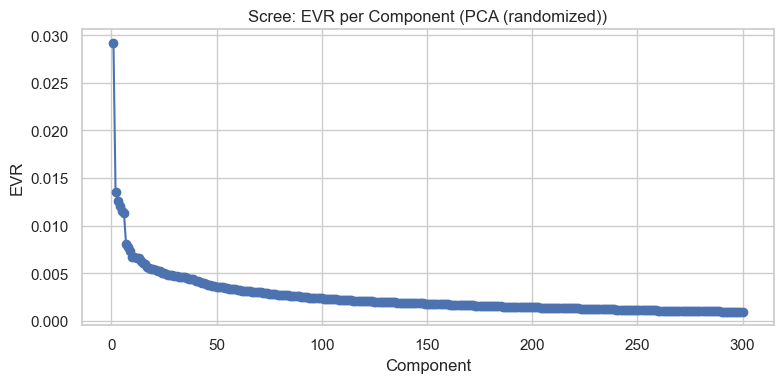

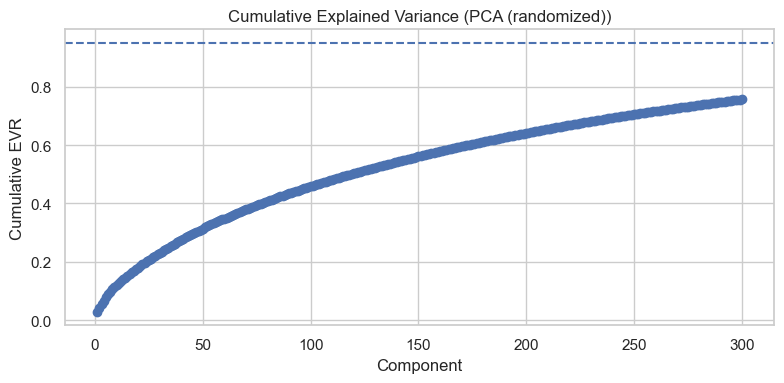

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from scipy import sparse

# choose component cap
n_features = X_train_std.shape[1]
n_components_try = max(2, min(300, n_features - 1))
evr_target = 0.95

if sparse.issparse(X_train_std):
    # SVD path (sparse)
    svd = TruncatedSVD(n_components=n_components_try, random_state=42)
    X_train_pcs = svd.fit_transform(X_train_std)
    X_test_pcs  = svd.transform(X_test_std)
    evr = svd.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    k = int(np.searchsorted(cum_evr, evr_target) + 1)
    k = max(2, min(k, n_components_try))
    model_used = "TruncatedSVD"
else:
    # PCA path (dense)
    # randomized solver is fast for many features/samples
    pca = PCA(n_components=n_components_try, svd_solver='randomized', random_state=42)
    X_train_pcs = pca.fit_transform(X_train_std)
    X_test_pcs  = pca.transform(X_test_std)
    evr = pca.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    k = int(np.searchsorted(cum_evr, evr_target) + 1)
    k = max(2, min(k, n_components_try))
    model_used = "PCA (randomized)"

print(f"{model_used}: tried {n_components_try} comps; "
      f"{k} comps reach ~{cum_evr[k-1]:.3f} cumulative variance.")

# keep first k
X_train_pca_std = X_train_pcs[:, :k]
X_test_pca_std  = X_test_pcs[:, :k]

pc_cols = [f"PC{i}" for i in range(1, k+1)]
train_ids = (sampled_data['train_numerical'].set_index('Id').index
             if 'Id' in sampled_data['train_numerical'].columns else None)
test_ids  = (sampled_data_test['test_numerical'].set_index('Id').index
             if 'Id' in sampled_data_test['test_numerical'].columns else None)

train_pca_std_df = pd.DataFrame(X_train_pca_std, index=train_ids, columns=pc_cols)
test_pca_std_df  = pd.DataFrame(X_test_pca_std,  index=test_ids,  columns=pc_cols)

# scree plots
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(evr)+1), evr, marker='o')
plt.title(f"Scree: EVR per Component ({model_used})")
plt.xlabel("Component"); plt.ylabel("EVR")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(cum_evr)+1), cum_evr, marker='o')
plt.axhline(evr_target, ls='--')
plt.title(f"Cumulative Explained Variance ({model_used})")
plt.xlabel("Component"); plt.ylabel("Cumulative EVR")
plt.tight_layout(); plt.show()



## Modeling
- Logistic regression model - L1 regularization
- Decision tree model (Tree depth (n=5))
- Hyper parameter tuning for both logistic regression and decision tree

In [89]:
import os
# Limit BLAS threads to avoid oversubscription (helps RAM/CPU thrash)
# Got this hint from the internet
os.environ.setdefault("OMP_NUM_THREADS", "1")
os.environ.setdefault("MKL_NUM_THREADS", "1")


from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import sparse

# Reload sampled data
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()
test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

assert 'Response' in train_num.columns, "Expected 'Response' in train_numerical"
y = train_num['Response'].astype(int)
train_num = train_num.drop(columns=['Response'])

# Align test columns to train columns
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

X_train_raw = pd.concat([train_num, train_cat], axis=1)
X_test_raw  = pd.concat([test_num,  test_cat],  axis=1)

# OHE factory that reduces cardinality + returns sparse
def make_ohe_slim():
    try:
        # Newer sklearn: group rare levels automatically
        return OneHotEncoder(
            handle_unknown='infrequent_if_exist',
            min_frequency=10,            
            sparse_output=True
        )
    except TypeError:
        try:
            return OneHotEncoder(
                handle_unknown='ignore',
                max_categories=50,
                sparse=True
            )
        except TypeError:
            return OneHotEncoder(
                handle_unknown='ignore',
                sparse=True
            )

ohe_linear = make_ohe_slim()
ohe_tree   = make_ohe_slim()

# Preprocessors
preproc_linear = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler',  StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     ohe_linear)
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0   # always prefer sparse if any block is sparse
)

preproc_tree = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     ohe_tree)
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)





## I performed dimensionality reduced before the classifier (often best for OHE-heavy data) and reran the program and its still running after 12 hours without completing the kernal. I determined that the bottlenecks are: (1) refitting OHE+SVD inside every CV fold, (2) too many candidates/folds, and (3) using a heavy solver on high-dim data.
## To make it run faster, I did the following: 
- Tune on a stratified subset (30k rows), then refit best params on the full 100k.
- Use HalvingRandomSearchCV (successive halving) with 3-fold CV.
- Shrink SVD to ~50 comps and n_iter=2.
- Use L1 + liblinear (binary) after SVD (way faster than saga here).
- For the tree, compress the categorical branch with OHE → SVD inside the ColumnTransformer (dramatically fewer features).

In [91]:
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.stats import loguniform

from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Pull sampled data 
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()
test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

y = train_num['Response'].astype(int)
train_num = train_num.drop(columns=['Response'])

# Align test to train columns
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

X_train_raw = pd.concat([train_num, train_cat], axis=1)
X_test_raw  = pd.concat([test_num,  test_cat],  axis=1)

# Slimmer OHE to cut width
def make_ohe_slim():
    try:
        # Newer sklearn: group rare levels
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=50, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

# Pipelines (FAST)
# (a) Logistic (L1) path: numeric (impute+scale) + categorical (OHE) to SVD(50) to L1 liblinear
preproc_linear = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler',  StandardScaler()),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

logit_pipe_fast = Pipeline([
    ('prep', preproc_linear),
    ('svd',  TruncatedSVD(n_components=50, n_iter=2, random_state=42)),
    ('clf',  LogisticRegression(
        penalty='l1', solver='liblinear',
        max_iter=2000, tol=1e-3, random_state=42
    ))
])

# (b) Decision Tree path: numeric (impute) + categorical (OHE to SVD(50)) ; concat to DT
preproc_tree_fast = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), numeric_features),
        ('cat_svd', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
            ('svd',     TruncatedSVD(n_components=50, n_iter=2, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

tree_pipe_fast = Pipeline([
    ('prep', preproc_tree_fast),
    ('clf',  DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Make a 30k stratified tuning subset
sss = StratifiedShuffleSplit(n_splits=1, train_size=min(30000, len(X_train_raw)), random_state=42)
tune_idx, _ = next(sss.split(X_train_raw, y))
X_tune = X_train_raw.iloc[tune_idx]
y_tune = y.iloc[tune_idx]

# HalvingRandomSearchCV (3-fold, small search)
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorer = 'roc_auc'

logit_search = HalvingRandomSearchCV(
    estimator=logit_pipe_fast,
    param_distributions={
        'clf__C': loguniform(1e-3, 1e0),             # 0.001..1
        'clf__class_weight': [None, 'balanced'],
        'svd__n_components': [30, 50, 80],
    },
    factor=2,              
    min_resources=8000,    # start with 8k samples then ramp up
    resource='n_samples',
    cv=cv3,
    n_jobs=1,              # safest for RAM
    verbose=1,
    random_state=42,
    refit=True
)

tree_search = HalvingRandomSearchCV(
    estimator=tree_pipe_fast,
    param_distributions={
        'clf__max_depth': [3, 5, 7, 9],
        'clf__min_samples_split': [2, 20, 100],
        'clf__min_samples_leaf': [1, 10, 50],
        'clf__class_weight': [None, 'balanced'],
        # Try a couple SVD sizes for the cat branch:
        'prep__cat_svd__svd__n_components': [30, 50, 80],
    },
    factor=2,
    min_resources=8000,
    resource='n_samples',
    cv=cv3,
    n_jobs=1,
    verbose=1,
    random_state=42,
    refit=True
)

print("=== Halving search (Logistic L1 + SVD) on 30k subset ===")
logit_search.fit(X_tune, y_tune)
print("Best AUC (tune):", logit_search.best_score_)
print("Best params:", logit_search.best_params_)

print("\n=== Halving search (Decision Tree + cat SVD) on 30k subset ===")
tree_search.fit(X_tune, y_tune)
print("Best AUC (tune):", tree_search.best_score_)
print("Best params:", tree_search.best_params_)

# ---------- 5) Refit best pipelines on FULL train, then predict TEST ----------
best_logit = logit_search.best_estimator_
best_tree  = tree_search.best_estimator_

best_logit.fit(X_train_raw, y)
best_tree.fit(X_train_raw, y)

test_proba_logit = best_logit.predict_proba(X_test_raw)[:, 1]
test_proba_tree  = best_tree.predict_proba(X_test_raw)[:, 1]

test_ids = X_test_raw.index
preds_df = pd.DataFrame({
    'Id': test_ids,
    'proba_logit_l1': test_proba_logit,
    'proba_tree':     test_proba_tree
})
preds_df.head()




=== Halving search (Logistic L1 + SVD) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best AUC (tune): 0.9941246327895493
Best params: {'clf__C': 0.0029380279387035343, 'clf__class_weight': None, 'svd__n_components': 80}

=== Halving search (Decision Tree + cat SVD) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 f

,Id,proba_logit_l1,proba_tree
0,19,0.005399,0.975533
1,37,0.005281,0.157209
2,46,0.005858,0.000000
3,241,0.005592,0.598296
4,300,0.005584,0.122731


## Evaluation
- F1 Score
- Precision
- RMSE
- Matthews Correlation Coefficient (MCC) between the predicted and the observed (will be done for the final project)

In [97]:
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    mean_squared_error, confusion_matrix, classification_report
)

# Make a stratified hold-out split (20% for validation)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(X_train_raw, y))

X_tr, X_val = X_train_raw.iloc[train_idx], X_train_raw.iloc[val_idx]
y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

# Evaluate a pipeline on the hold-out
def evaluate_pipeline(pipeline, name: str, threshold: float = 0.5):
    # clone to avoid mutating tuned objects
    model = clone(pipeline)
    model.fit(X_tr, y_tr)

    # hard preds at given threshold (use predict_proba for consistent thresholding)
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred  = (y_proba >= threshold).astype(int)

    # metrics
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall    = recall_score(y_val, y_pred, zero_division=0)
    f1        = f1_score(y_val, y_pred, zero_division=0)

    # RMSE probabilities and label computed:
    rmse_prob  = np.sqrt(mean_squared_error(y_val, y_proba))   # on probabilities
    rmse_label = np.sqrt(mean_squared_error(y_val, y_pred))    # on 0/1 predictions

    cm = confusion_matrix(y_val, y_pred)

    print(f"\n=== {name} @ threshold={threshold:.2f} ===")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print(f"RMSE (prob):  {rmse_prob:.4f}")
    print(f"RMSE (label): {rmse_label:.4f}")
    print("Confusion matrix [TN FP; FN TP]:\n", cm)

    return {
        "Model": name,
        "Threshold": threshold,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "RMSE_prob": rmse_prob,
        "RMSE_label": rmse_label
    }

# Choose a threshold that maximizes F1 on the val set
def best_f1_threshold(pipeline, grid=np.linspace(0.1, 0.9, 17)):
    model = clone(pipeline).fit(X_tr, y_tr)
    y_proba = model.predict_proba(X_val)[:, 1]
    best_th, best_f1 = 0.5, -1.0
    for th in grid:
        f1 = f1_score(y_val, (y_proba >= th).astype(int), zero_division=0)
        if f1 > best_f1:
            best_f1, best_th = f1, th
    return best_th, best_f1

# Find per-model best thresholds (fast) and evaluate at both 0.5 and best-F1
results = []

# Logistic (L1)
th_logit, f1_logit = best_f1_threshold(best_logit)
results.append(evaluate_pipeline(best_logit, "Logistic L1", threshold=0.5))
results.append(evaluate_pipeline(best_logit, "Logistic L1 (best-F1 th)", threshold=th_logit))

# Decision Tree
th_tree, f1_tree = best_f1_threshold(best_tree)
results.append(evaluate_pipeline(best_tree, "Decision Tree (depth≈5)", threshold=0.5))
results.append(evaluate_pipeline(best_tree, "Decision Tree (best-F1 th)", threshold=th_tree))

# Compact comparison table
eval_df = pd.DataFrame(results)
eval_df = eval_df[["Model", "Threshold", "Precision", "F1", "RMSE_prob", "RMSE_label"]]
eval_df.sort_values(by=["F1", "Precision"], ascending=False, inplace=True)
eval_df.reset_index(drop=True, inplace=True)
eval_df



=== Logistic L1 @ threshold=0.50 ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
RMSE (prob):  0.0756
RMSE (label): 0.0759
Confusion matrix [TN FP; FN TP]:
 [[19870     0]
 [  115     0]]

=== Logistic L1 (best-F1 th) @ threshold=0.10 ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
RMSE (prob):  0.0756
RMSE (label): 0.0759
Confusion matrix [TN FP; FN TP]:
 [[19870     0]
 [  115     0]]

=== Decision Tree (depth≈5) @ threshold=0.50 ===
Precision: 0.0067 | Recall: 0.4609 | F1: 0.0132
RMSE (prob):  0.4046
RMSE (label): 0.6307
Confusion matrix [TN FP; FN TP]:
 [[11982  7888]
 [   62    53]]

=== Decision Tree (best-F1 th) @ threshold=0.90 ===
Precision: 0.0741 | Recall: 0.1217 | F1: 0.0921
RMSE (prob):  0.4046
RMSE (label): 0.1175
Confusion matrix [TN FP; FN TP]:
 [[19695   175]
 [  101    14]]


,Model,Threshold,Precision,F1,RMSE_prob,RMSE_label
0,Decision Tree (best-F1 th),0.9,0.074074,0.092105,0.404589,0.117517
1,Decision Tree (depth≈5),0.5,0.006674,0.013158,0.404589,0.630713
2,Logistic L1,0.5,0.000000,0.000000,0.075630,0.075857
3,Logistic L1 (best-F1 th),0.1,0.000000,0.000000,0.075630,0.075857
